# Domain Analysis

## 1. **Client Profile Attributes**

These features provide insights into the client’s personal and financial background. Understanding these characteristics helps tailor marketing efforts and predict subscription behavior more accurately.

### Key Features

* **Age**

  * **Insight**: Age influences financial priorities.
  * **Impact**: Middle-aged individuals often focus on long-term savings and are more inclined to invest in term deposits.

* **Job Type**

  * **Insight**: Indicates socio-economic status and earning potential.
  * **Impact**: Retired individuals or students may show less interest due to financial constraints, whereas professionals and business owners tend to be better prospects.

* **Marital Status**

  * **Insight**: Reflects life responsibilities and investment attitudes.
  * **Impact**: Married individuals may prefer low-risk investments to secure family financial stability.

* **Education Level**

  * **Insight**: Directly impacts financial literacy.
  * **Impact**: Higher education levels often correlate with a better understanding of financial products and a greater likelihood to subscribe.

* **Default History**

  * **Insight**: Sign of financial risk.
  * **Impact**: Clients with a history of default are typically avoided and less likely to engage with new financial products.

* **Housing Loan Status**

  * **Insight**: Reflects existing financial liabilities.
  * **Impact**: May reduce the ability to allocate funds toward new investments.

* **Personal Loan Status**

  * **Insight**: Additional debt obligations.
  * **Impact**: Clients repaying personal loans are often risk-averse and less financially flexible.

---

## 2. **Last Contact Details (Call-Based Campaign Data)**

These features reflect how the last marketing interaction was conducted, which can greatly influence the success of the campaign.

### Key Features

* **Contact Type**

  * **Insight**: Determines communication channel—cellular or landline.
  * **Impact**: Mobile phones generally yield higher engagement due to better accessibility.

* **Month of Contact**

  * **Insight**: Seasonality affects client behavior.
  * **Impact**: Engagement can drop during holiday months (e.g., December), while mid-year campaigns (e.g., May, June) are typically more successful.

* **Day of the Week**

  * **Insight**: Certain days result in better responsiveness.
  * **Impact**: Mid-week calls (Wednesday, Thursday) tend to perform better than calls placed on Mondays.

* **Call Duration**

  * **Insight**: Strong indicator of client interest.
  * **Impact**: Longer calls often signify higher interest.
  * **Note**: *This feature should be excluded from predictive models prior to the call, as it is only known after the interaction.*

---

## 3. **Campaign Engagement Metrics**

These features summarize the frequency and outcomes of marketing interactions across current and past campaigns.

### Key Features

* **Number of Calls in Current Campaign (`campaign`)**

  * **Insight**: Measures campaign intensity.
  * **Impact**: High frequency may signal aggressiveness, possibly leading to client disengagement.

* **Days Since Last Contact (`pdays`)**

  * **Insight**: Indicates whether the client has been contacted recently or at all.
  * **Impact**: Clients with recent contact history may recall past offers, potentially improving engagement.

* **Previous Contacts (`previous`)**

  * **Insight**: Total contacts before the current campaign.
  * **Impact**: Repeated contact without success may imply disinterest.

* **Outcome of Previous Campaign (`poutcome`)**

  * **Insight**: Past behavior is predictive of future decisions.
  * **Impact**: A previously successful campaign is a strong positive signal.

---

## 4. **Macroeconomic Environment**

External economic indicators influence the client's financial optimism and capacity to invest.

### Key Features

* **Employment Variation Rate (`emp.var.rate`)**

  * **Insight**: Measures change in employment.
  * **Impact**: A rising employment rate suggests a robust economy, making clients more willing to invest.

* **Consumer Price Index (`cons.price.idx`)**

  * **Insight**: Proxy for inflation.
  * **Impact**: Higher inflation may push clients toward fixed-income instruments like term deposits.

* **Consumer Confidence Index (`cons.conf.idx`)**

  * **Insight**: Reflects public sentiment about the economy.
  * **Impact**: Low confidence usually drives people toward safer savings options.

* **Euribor 3-Month Rate (`euribor3m`)**

  * **Insight**: Benchmark interest rate in the EU.
  * **Impact**: A lower Euribor rate makes bank deposit offers more appealing.

* **Number of Employed Individuals (`nr.employed`)**

  * **Insight**: Indicates overall labor market health.
  * **Impact**: A larger employed population can lead to increased investment confidence.

---

## 5. **Target Variable**

* **Subscription (`y`)**

  * **Definition**: Binary variable indicating whether the client subscribed to a term deposit.
  * **Objective**: This is the target of prediction for all machine learning models in the project.

# Python Implementation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#  1. DATA LOADING AND BASIC CHECKS

In [10]:
data = pd.read_csv("bank-additional-full.csv",sep=';')
print("Data loaded successfully")
print(f"Dataset shape: {data.shape}\n")

Data loaded successfully
Dataset shape: (41188, 21)



In [11]:
print(" First 5 rows:")
display(data.head())

 First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
print("\n Data types and missing values:")
print(data.info())
    


 Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17

### Insights from Initial Data Inspection:
- The dataset contains 41,188 records with 21 features
- No missing values are present 
- The data includes both numerical and categorical features


In [13]:
print("\n Descriptive statistics (numerical):")
display(data.describe())  


 Descriptive statistics (numerical):


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Insights from Numerical Features Analysis:
- Age ranges from 17 to 98 years with mean 40.02 years
- 'duration' (last contact duration) has a wide range (0-4918 seconds) with mean 258 seconds
- 'campaign' (number of contacts) ranges from 1 to 56 with mean 2.57
- 'pdays' shows 999 for many records (75th percentile is 999), which likely indicates no previous contact
- Economic indicators ('emp.var.rate', 'cons.price.idx', etc.) show variation across records
- 'nr.employed' (number of employees) ranges from 4963.6 to 5228.1

In [14]:
print("\n Descriptive statistics (categorical):")
display(data.describe(include='O'))


 Descriptive statistics (categorical):


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Insights from Categorical Features Analysis:
- Most common job is 'admin.' (10,422 occurrences)
- Majority of clients are married (24,928)
- Education levels show 'university.degree' is most common (12,168)
- Most clients have no credit in default ('no': 32,588)
- Housing and personal loans are mostly 'no' (33,950 for loan)
- Most contacts are via 'cellular' (26,144)
- Most calls were made in May (13,769) and on Thursday (8,623)
- Previous outcome is mostly 'nonexistent' (35,563)
- Target variable 'y' is mostly 'no' (36,548), indicating class imbalance

In [15]:
print("\n Unique values in categorical columns:")
for col in data.select_dtypes(include='object').columns:
   print(f"{col}: {data[col].unique()}")


 Unique values in categorical columns:
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


### Insights from Unique Values:
- The 'job' feature includes expected categories like 'admin.', 'blue-collar', 'technician'
- 'education' has some basic levels (basic.4y, basic.6y, basic.9y) and higher education
- 'default', 'housing', and 'loan' all include 'unknown' as a category
- 'contact' is only via 'telephone' or 'cellular'
- Months are represented without December (only up to November)
- 'poutcome' shows outcomes from previous campaigns

#  2. EDA : Exploratory Data Analysis

In [16]:

data_clean = data.copy()
data_clean = data_clean.drop('duration', axis=1)  # domain knowledge

cols_to_mode = ['job', 'marital', 'default', 'housing', 'loan']
for col in cols_to_mode:
    mode_val = data_clean[col][data_clean[col] != 'unknown'].mode()[0]
    data_clean[col] = data_clean[col].replace('unknown', mode_val)


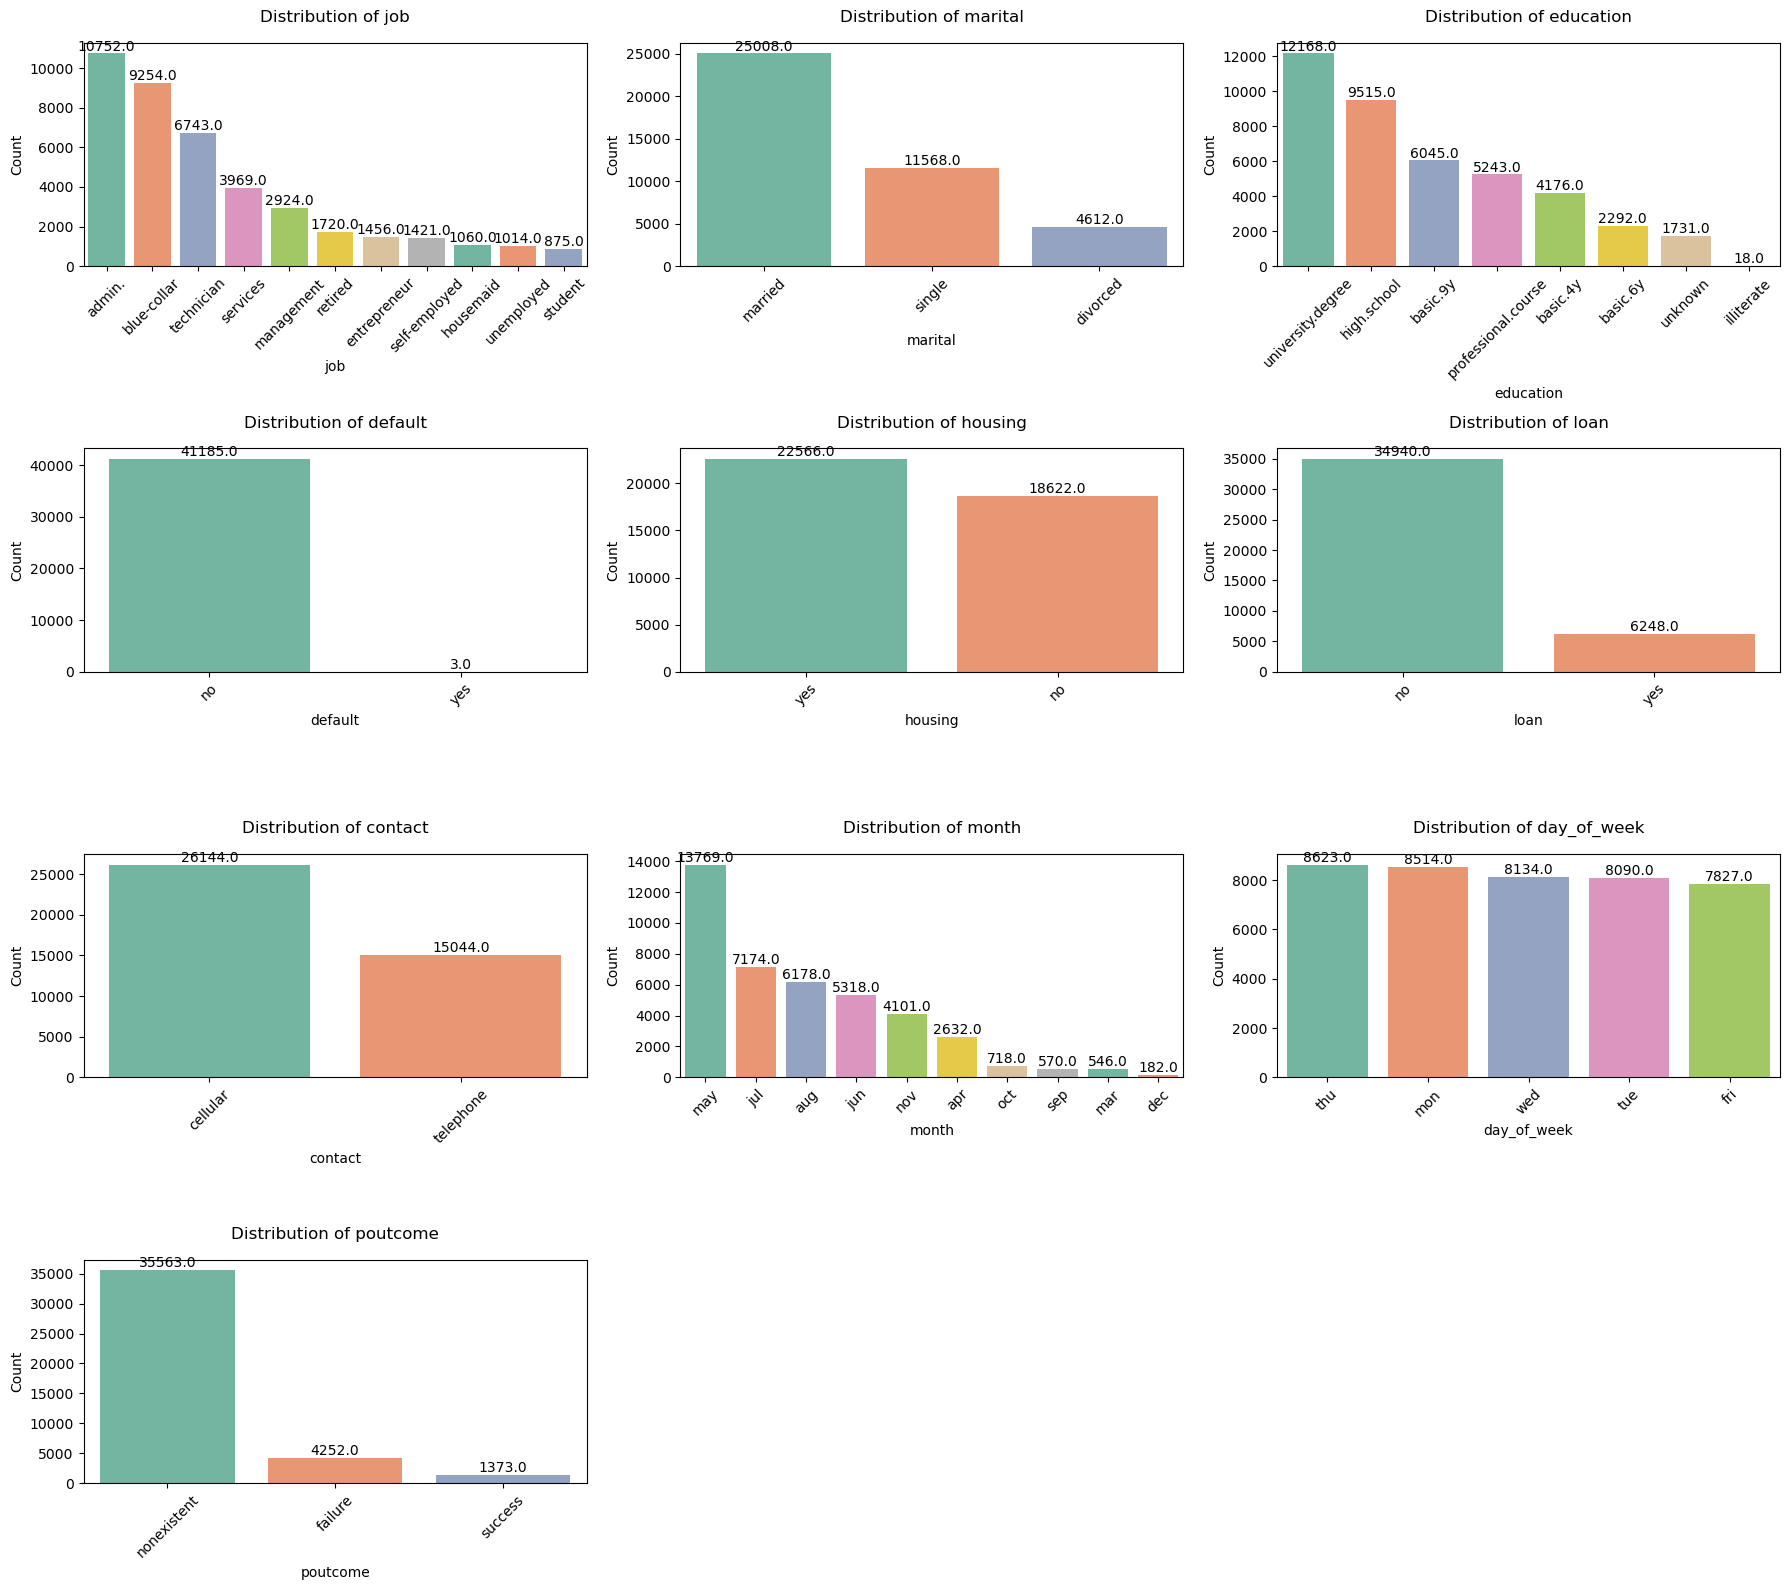

In [17]:
#  Categorical Feature Distribution
categorical_cols = [col for col in data_clean.select_dtypes(include='object').columns if col != 'y']

n_cols = 3
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=data_clean[col], ax=ax, palette='Set2', order=data_clean[col].value_counts().index)
    ax.set_title(f'Distribution of {col}', pad=15)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    ax.tick_params(axis='x', rotation=45)

for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

###  Insights from Categorical Feature :

- Most clients work in 'admin.', 'blue-collar', or 'technician' roles.
- Majority of clients are married, followed by singles and a small group of divorced.
- Higher education levels (university, high school) dominate the education distribution.
- Almost all clients have no credit default, making this feature highly imbalanced.
- Housing loans are fairly balanced between 'yes' and 'no'.
- Most clients do not have a personal loan.
- Contact is more frequently made via cellular than telephone.
- May and July are the peak months for client contact; very low activity in December.
- Weekday calls are evenly distributed, with Thursday having a slight edge.
- Most clients were never contacted in a previous campaign (poutcome = nonexistent).


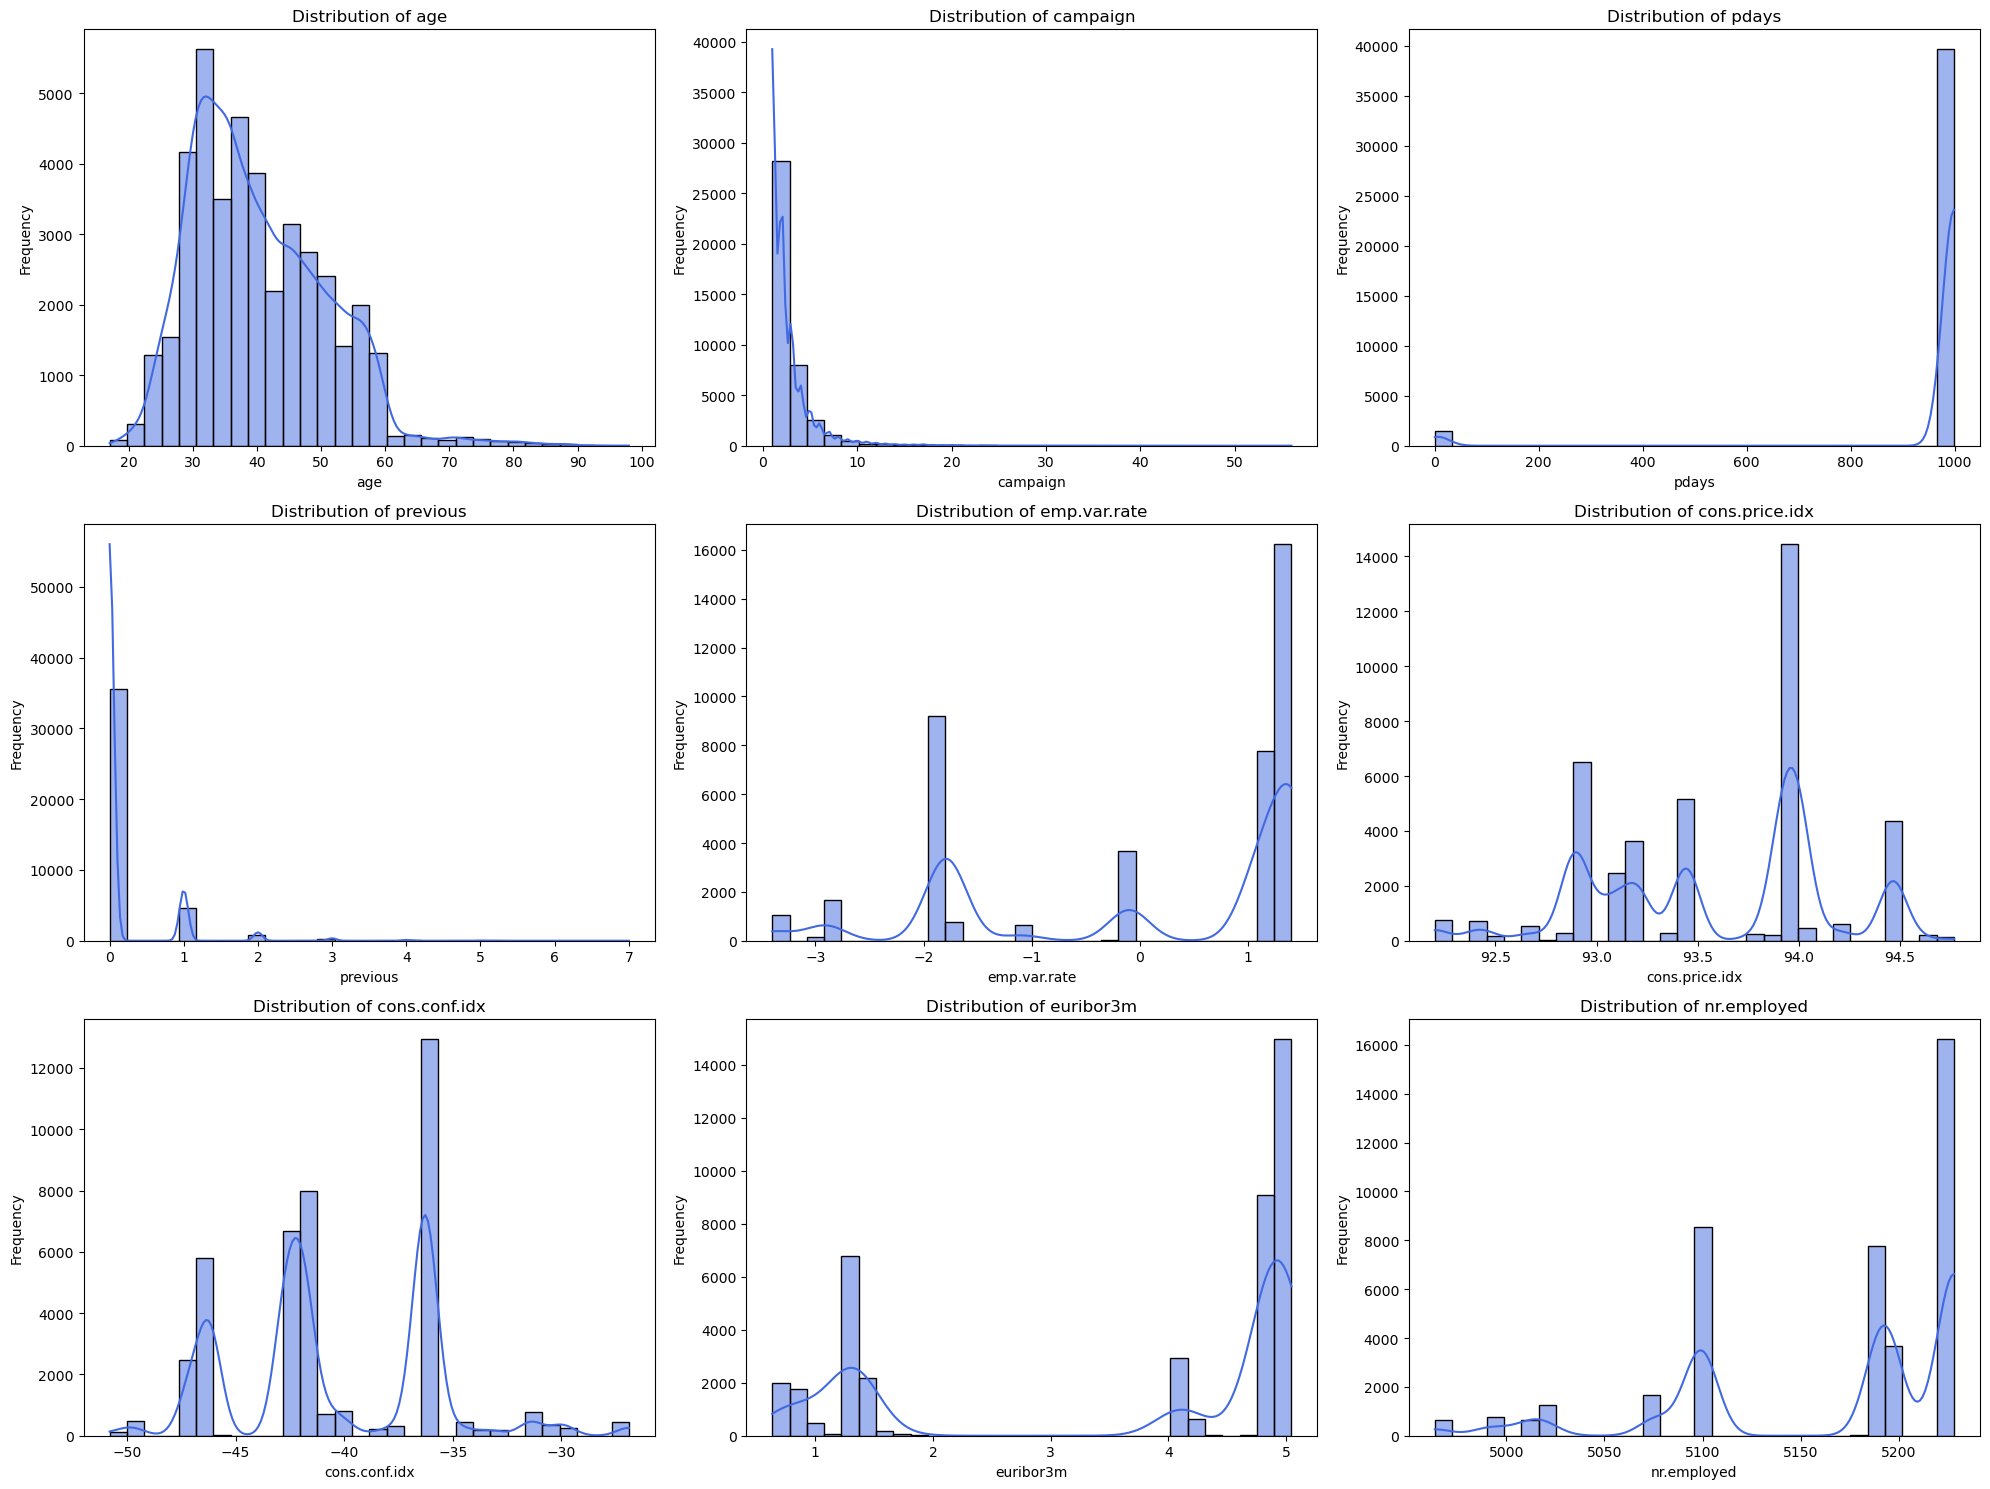

In [18]:
#  Histograms for Numerical Features 
numerical_cols = data_clean.select_dtypes(include=np.number).columns.tolist()
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  # Larger for better spacing
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=data_clean, x=col, kde=True, ax=axes[i], color='royalblue', bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


###  Insights from Numerical Feature Distributions:

- 'age' is right-skewed with a majority of clients between 25–40 years old.
- 'campaign' is heavily skewed; most clients were contacted less than 5 times.
- 'pdays' shows a spike at 999, indicating clients not contacted in previous campaigns.
- 'previous' is mostly zero, showing limited past client engagement.
- 'emp.var.rate' has a few discrete peaks, mostly around 1.1, -1.8, and -3.4.
- 'cons.price.idx' shows values clustered around 93.0 to 94.0 with multiple peaks.
- 'cons.conf.idx' ranges from -50 to -30, showing distinct sentiment groups.
- 'euribor3m' peaks at higher values (~4.9), indicating dominant interest rate environments.
- 'nr.employed' clusters around 5000–5200, reflecting stable labor market periods.


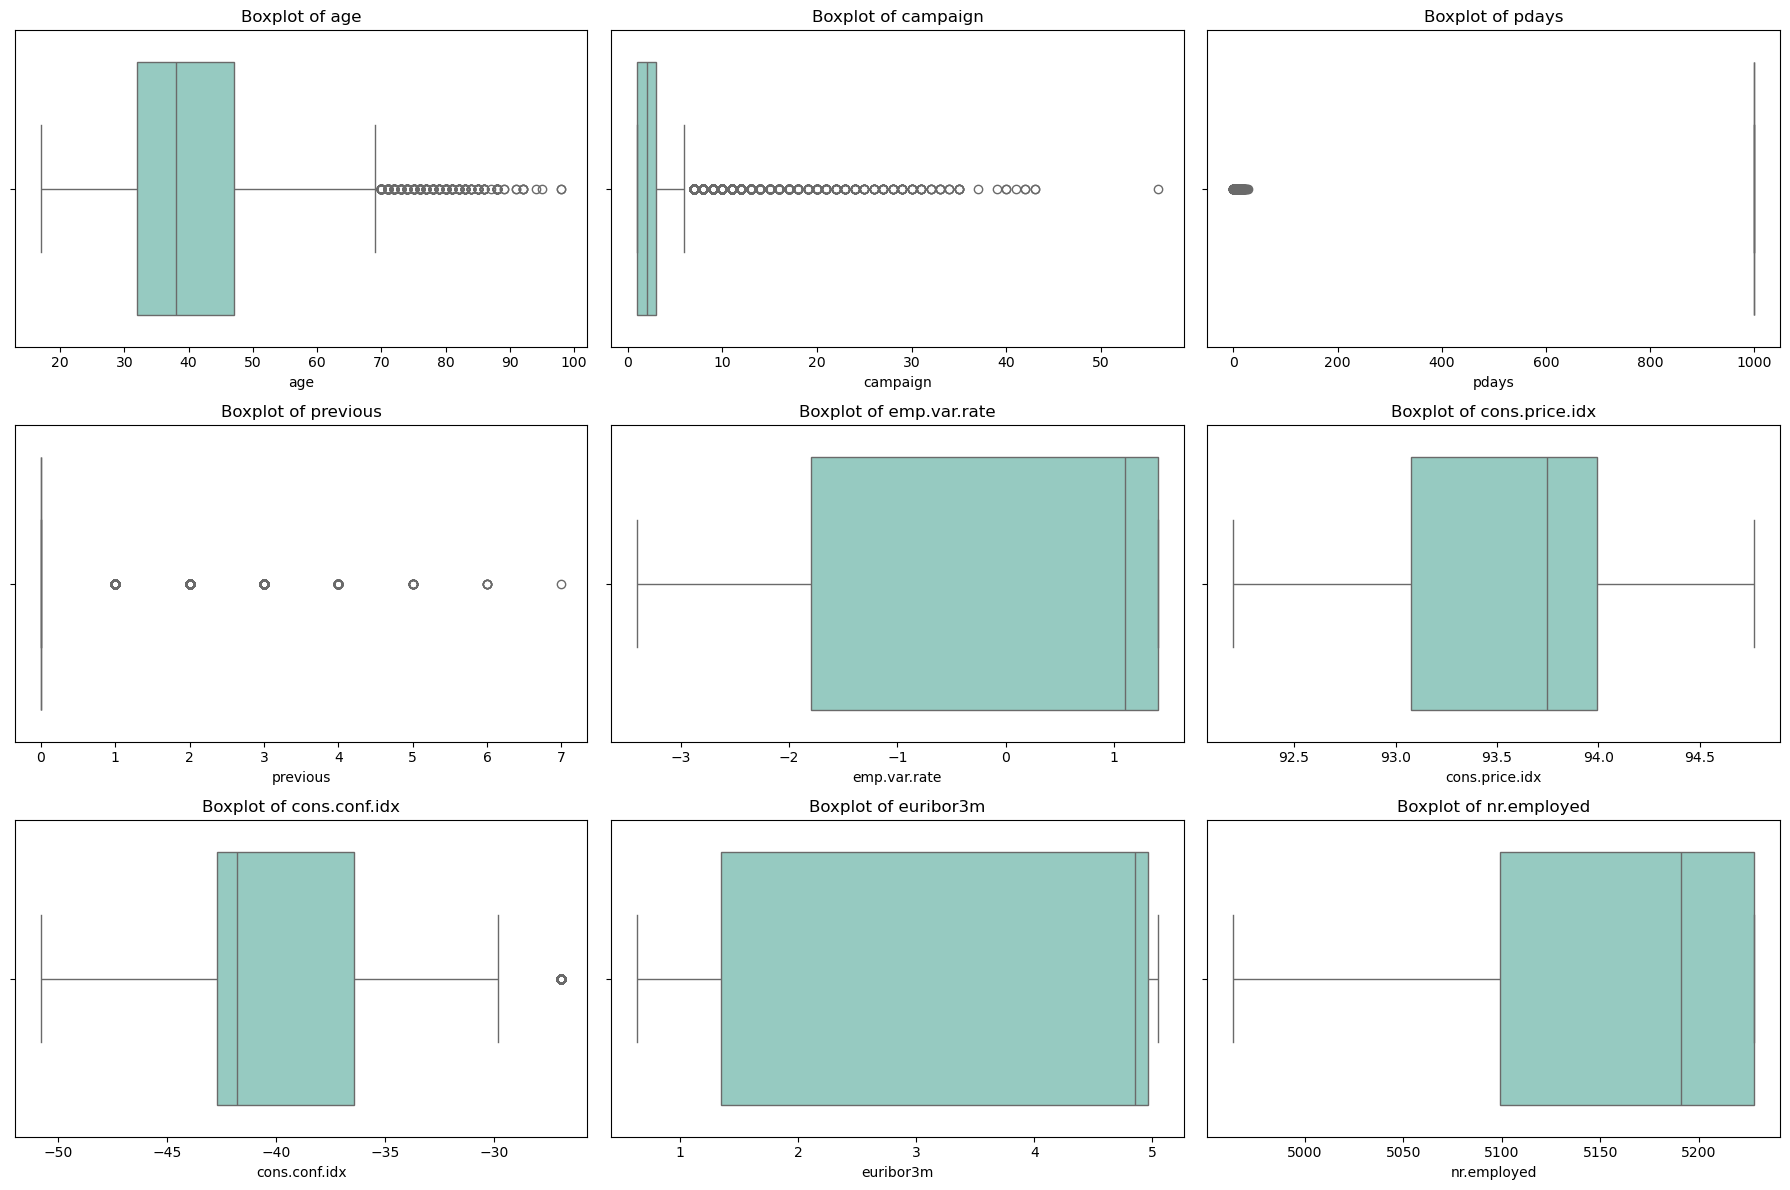

In [19]:
#  Boxplots for Outlier Detection 
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data_clean[col], ax=axes[i], palette='Set3')
    axes[i].set_title(f'Boxplot of {col}')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


###  Insights from Boxplots (Outlier Detection):

- 'age' has several high-value outliers above 60.
- 'campaign' contains many extreme outliers beyond 10 contacts.
- 'pdays' has a large number of extreme outliers, mainly at 999.
- 'previous' shows multiple discrete outliers above 1.
- 'emp.var.rate' is mostly within range with few mild outliers.
- 'cons.price.idx' shows no significant outliers.
- 'cons.conf.idx' has one notable high outlier around -30.
- 'euribor3m' shows a clean distribution with minimal outliers.
- 'nr.employed' is well-distributed without visible outliers.


In [20]:
#  Skewness Report
skewness = data_clean[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of Numerical Features:\n")
print(skewness)

Skewness of Numerical Features:

campaign          4.762507
previous          3.832042
age               0.784697
cons.conf.idx     0.303180
cons.price.idx   -0.230888
euribor3m        -0.709188
emp.var.rate     -0.724096
nr.employed      -1.044262
pdays            -4.922190
dtype: float64


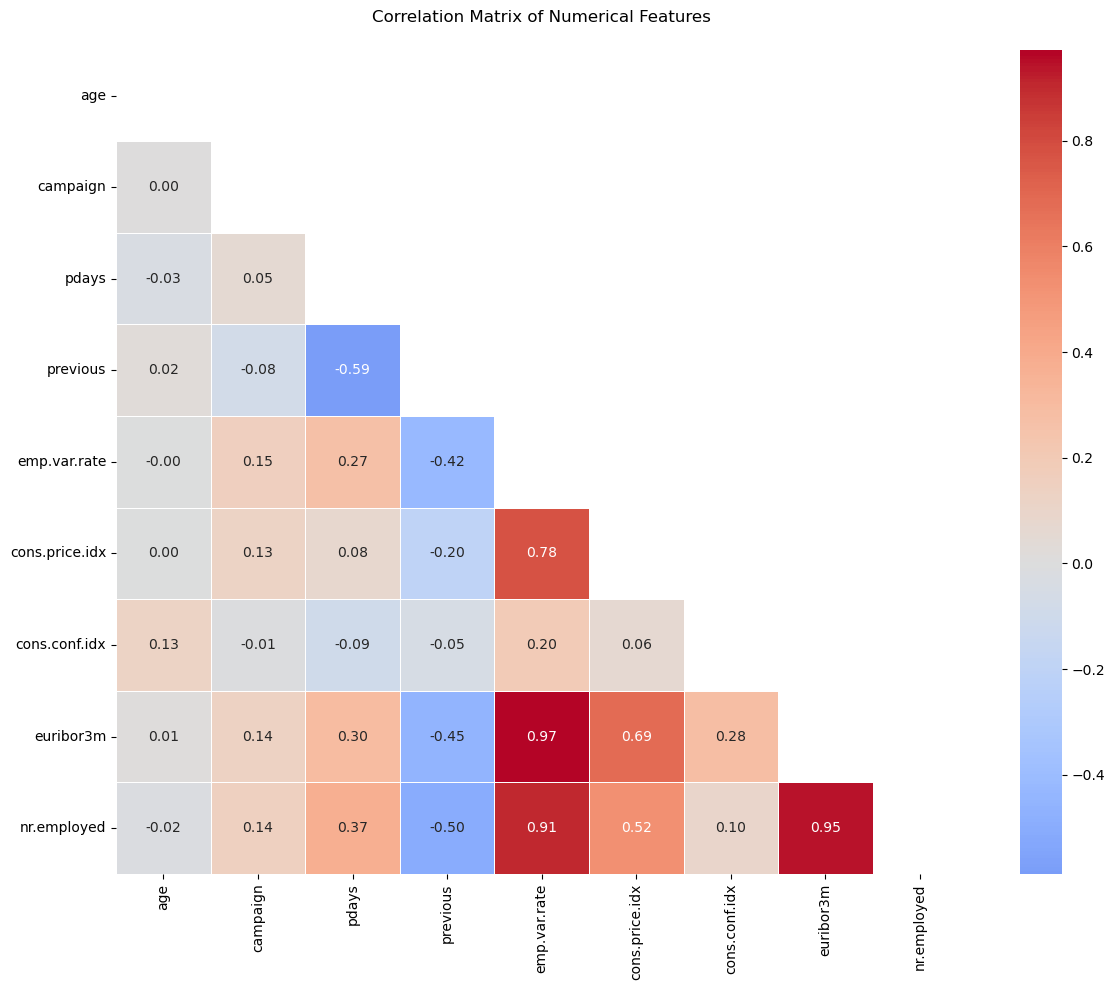

In [21]:
#  Correlation Heatmap
plt.figure(figsize=(12,10))
corr_matrix = data_clean[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', pad=20)
plt.tight_layout()
plt.show()


###  Insights from Correlation Matrix:

- 'emp.var.rate' and 'euribor3m' have very high positive correlation (0.97).
- 'nr.employed' is strongly correlated with 'euribor3m' (0.95) and 'emp.var.rate' (0.91).
- 'cons.price.idx' shows a moderate positive correlation with 'emp.var.rate' (0.78).
- 'pdays' has a moderate positive correlation with 'nr.employed' (0.37).
- 'previous' is moderately negatively correlated with 'pdays' (-0.59).
- Most other features show weak or negligible correlations with each other.


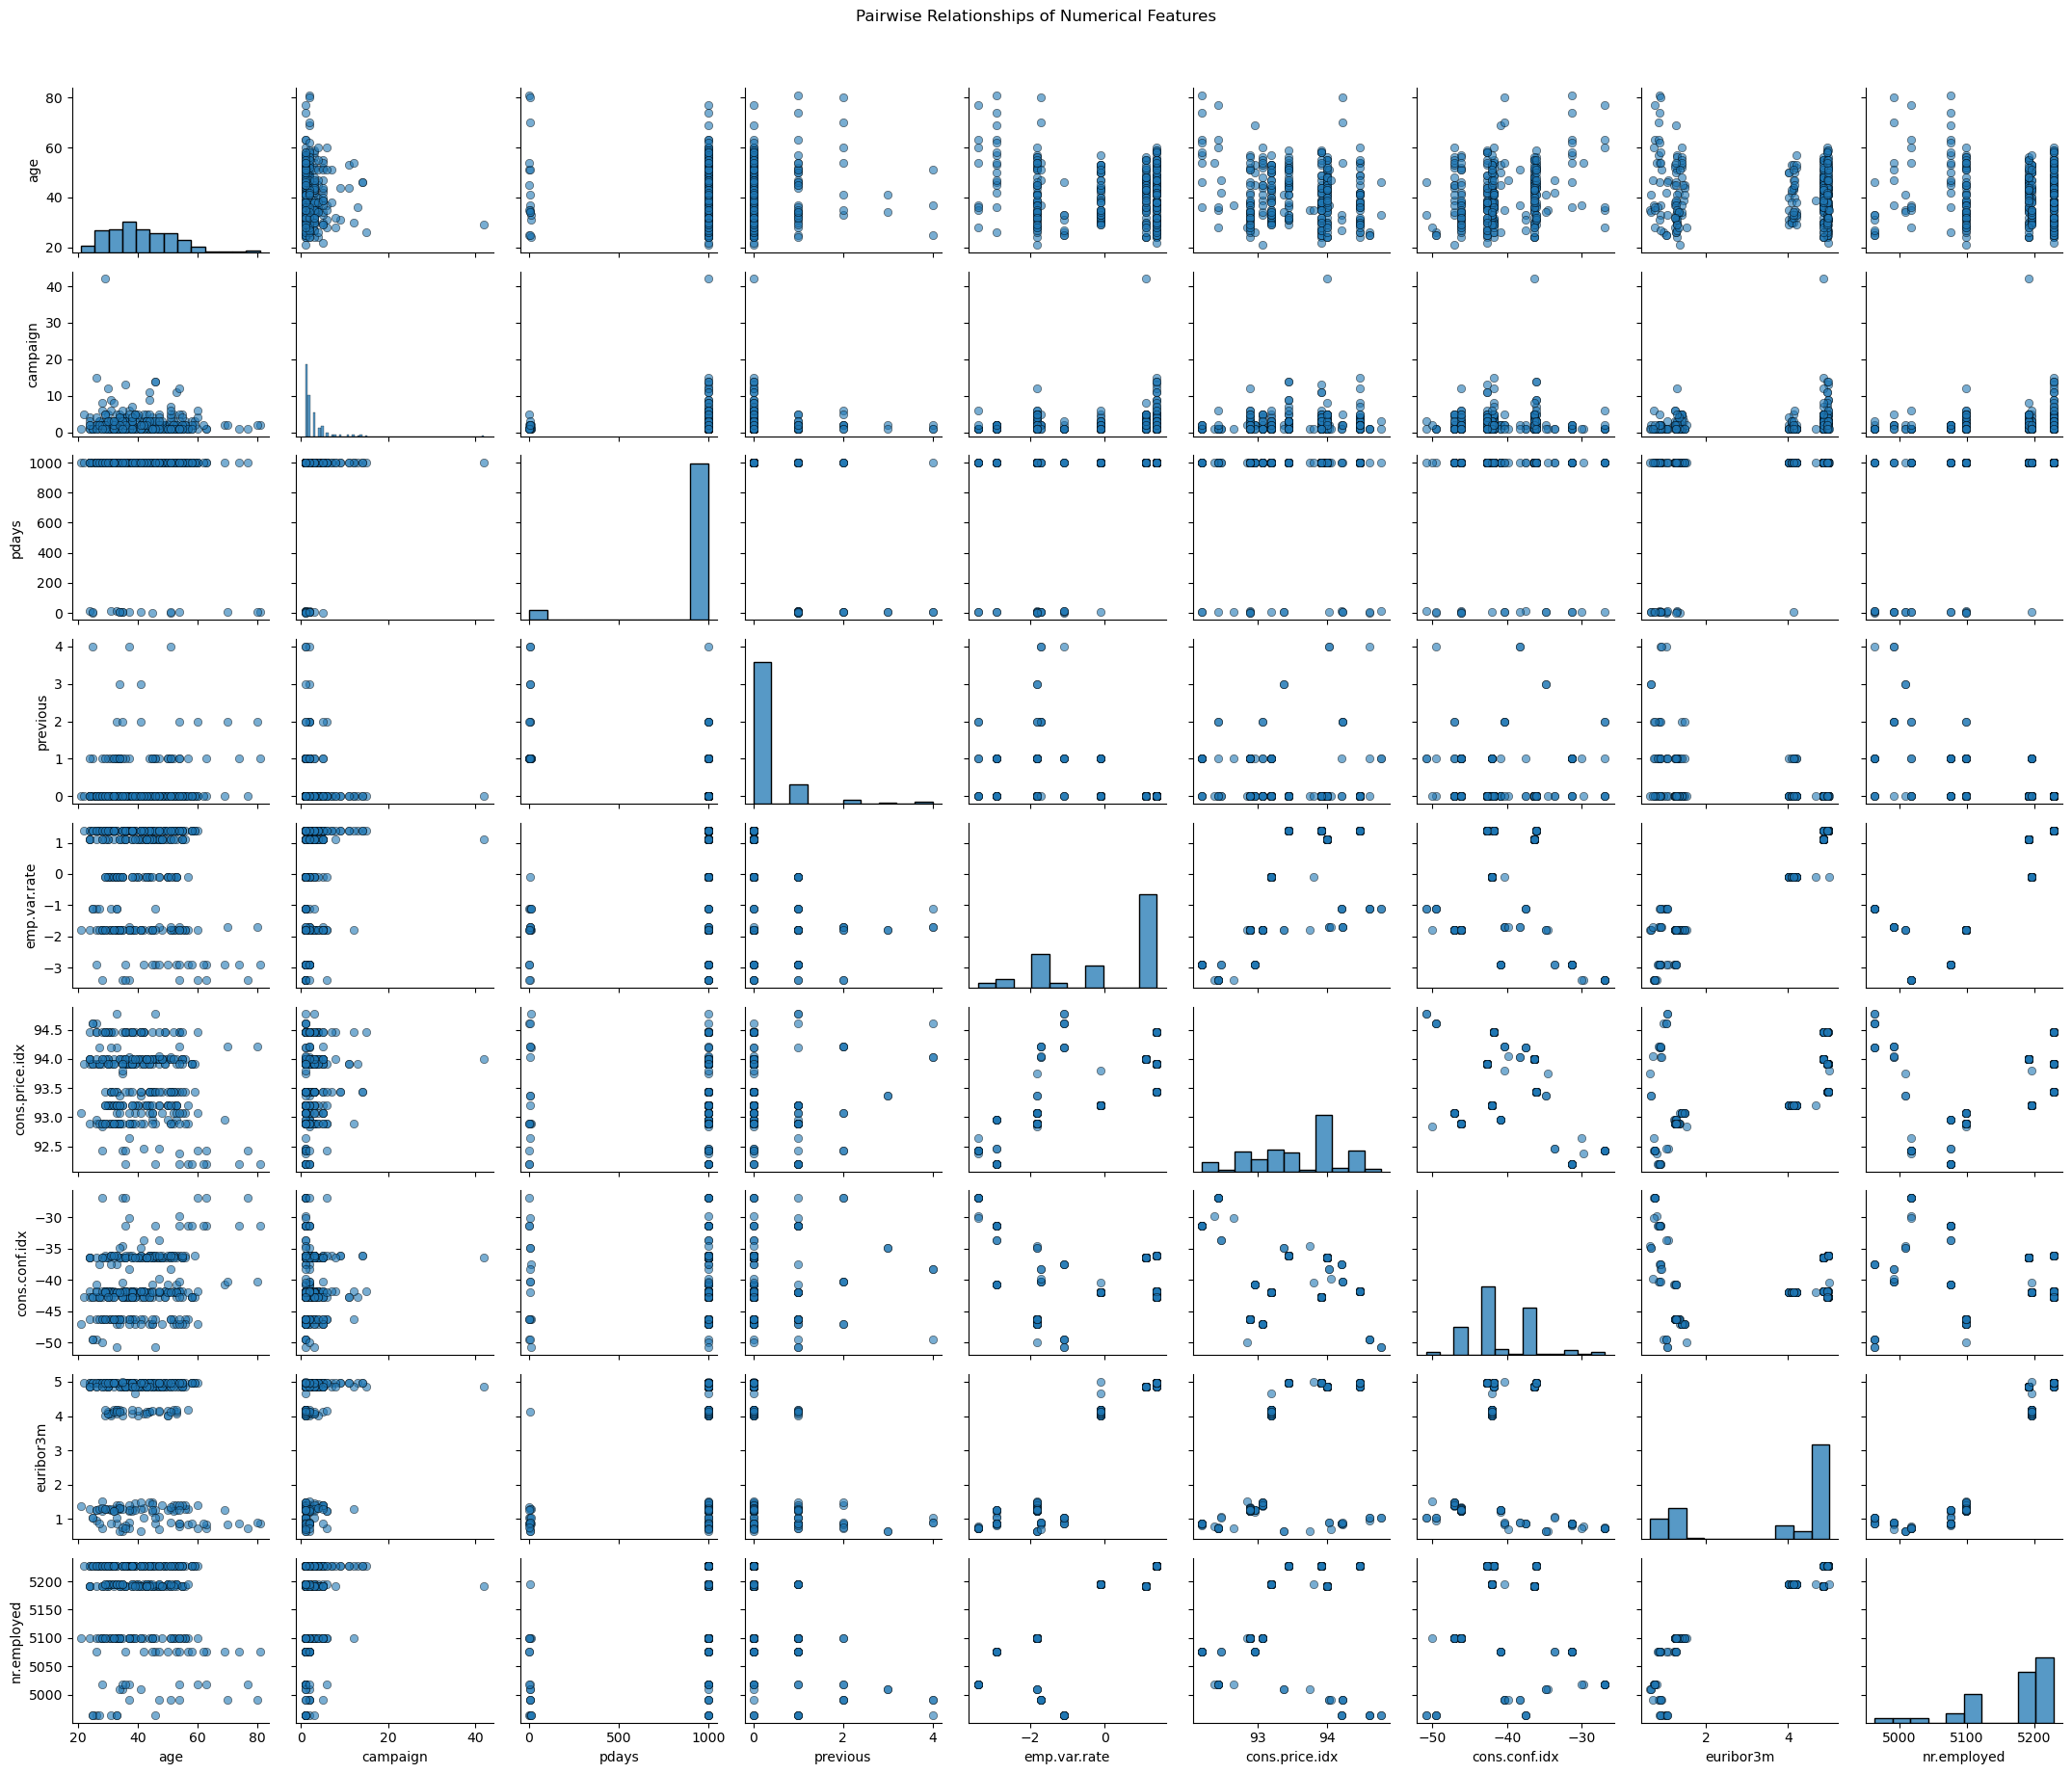

In [22]:
#  Pairplot of Numerical Features 
sns.pairplot(data_clean[numerical_cols].sample(n=300, random_state=42), height=2, aspect=1.2, plot_kws={'alpha':0.6, 'edgecolor':'k'})
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

###  Insights from Pairplot of Numerical Features:

- Most features show scattered distributions with minimal linear relationships.
- 'emp.var.rate', 'euribor3m', and 'nr.employed' show clustered linear trends among each other.
- Features like 'pdays' and 'previous' are highly skewed and sparsely distributed.
- 'campaign' and 'age' appear widely spread with visible outliers.
- Strongest visible alignment is between 'emp.var.rate' and 'euribor3m', consistent with correlation heatmap.


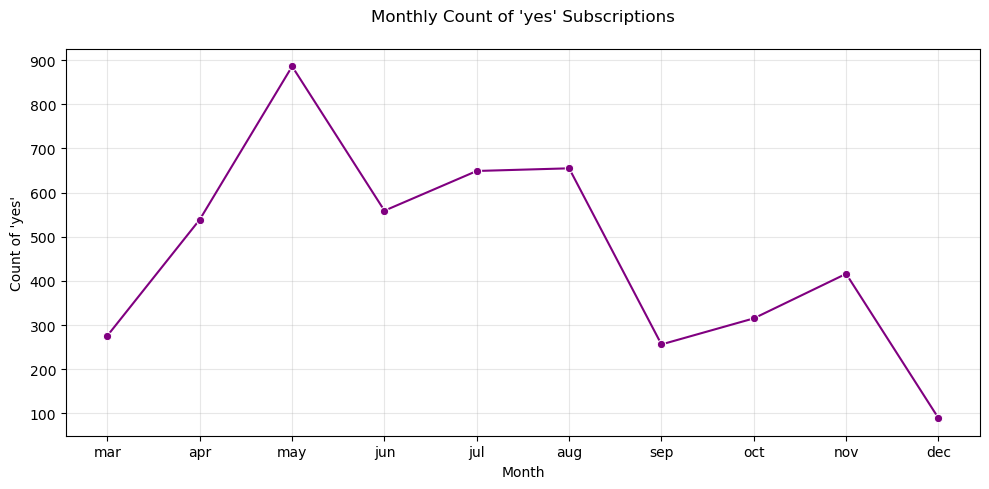

In [23]:
#  Subscription Rate by Month
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_y = data_clean[data_clean['y'] == 'yes']['month'].value_counts().reindex(month_order)
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_y.index, y=monthly_y.values, marker='o', color='purple')
plt.title("Monthly Count of 'yes' Subscriptions", pad=20)
plt.xlabel("Month")
plt.ylabel("Count of 'yes'")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Insights from Monthly 'yes' Subscriptions:

* Subscriptions peaked in May (~900)
* Strong growth from March to May
* June to August shows steady performance (~650)
* Sharp drop in September (~260)
* Minor recovery in October and November
* December has the lowest subscriptions (~90)


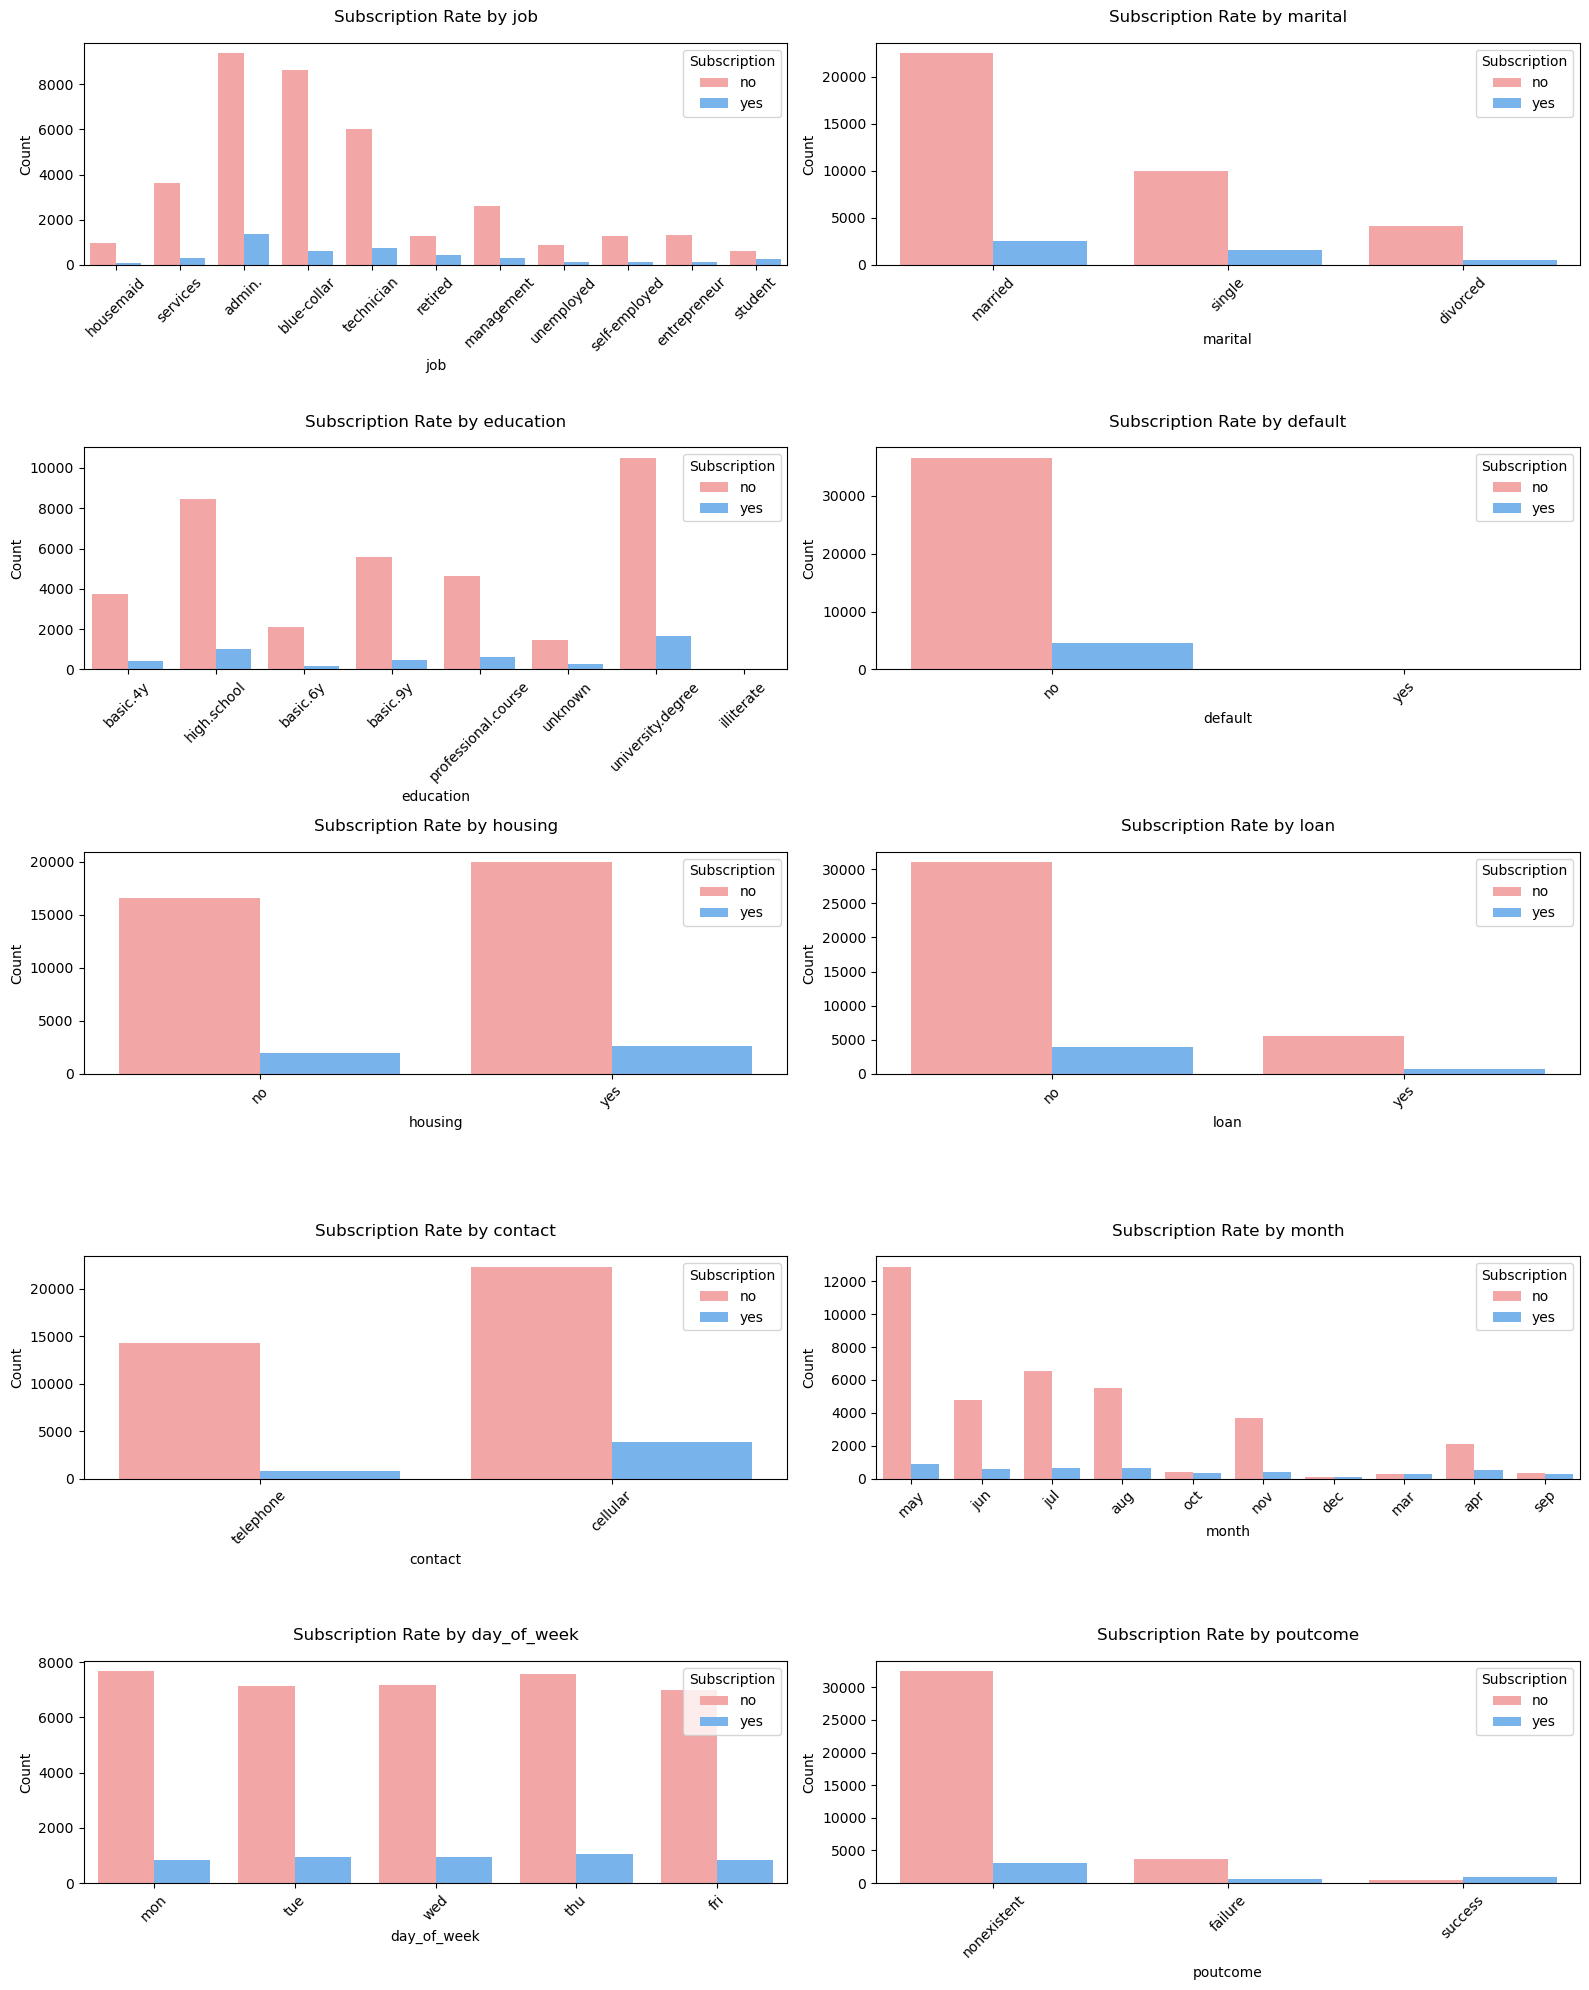

In [24]:
#  Categorical Features vs Target (Multi-plot Grid)
n_cols = 2
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data_clean, x=col, hue='y', palette=['#ff9999','#66b3ff'], ax=axes[i])
    axes[i].set_title(f'Subscription Rate by {col}', pad=15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Subscription', loc='upper right')

for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Insights from Categorical Subscription Rates:

* **Housing**: Fewer 'yes' subscriptions for those with housing loans
* **Loan**: Majority of 'yes' responses from people without personal loans
* **Contact**: 'Cellular' contact results in significantly more 'yes' responses than 'telephone'
* **Month**: May shows the highest 'yes' count; very low in December
* **Day of Week**: Subscriptions fairly consistent across weekdays, slight edge on Monday
* **Poutcome**: Previous success leads to higher current subscriptions
* **Job**: 'Retired' and 'student' show relatively higher subscription rates compared to other jobs
* **Marital**: 'Single' clients more likely to subscribe than 'married' or 'divorced'
* **Education**: 'University degree' and 'high school' have more 'yes' responses
* **Default**: Nearly all 'yes' responses come from those with no credit default


# 4. Feature Selection and Feature Engineering

In [25]:
#  Feature Engineering
data_clean['was_contacted'] = np.where(data_clean['pdays'] == 999, 0, 1)
data_clean['contact_frequency'] = pd.cut(data_clean['previous'], bins=[-1, 0, 3, 100], labels=['none', 'low', 'high'])
data_clean = data_clean.drop(['pdays', 'previous'], axis=1)

print("✅ Added engineered features:\n- was_contacted: 1 if client was contacted before\n- contact_frequency: contact level based on number of previous contacts")
print("\nFinal shape:", data_clean.shape)
data_clean.head(2)

✅ Added engineered features:
- was_contacted: 1 if client was contacted before
- contact_frequency: contact level based on number of previous contacts

Final shape: (41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,was_contacted,contact_frequency
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,none
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,none


In [27]:
#  Feature Selection

from scipy.stats import pointbiserialr, chi2_contingency

y = data_clean['y'].map({'yes':1, 'no':0})
    
print(" Numerical feature selection:")
num_features = data_clean.select_dtypes(include=np.number).columns.drop('y', errors='ignore')
num_results = []
    
for col in num_features:
    corr, p_val = pointbiserialr(data_clean[col], y)
    num_results.append((col, corr, p_val))
    
num_df = pd.DataFrame(num_results, columns=['Feature', 'Correlation', 'p-value'])
sig_num_features = num_df[num_df['p-value'] < 0.05]['Feature'].tolist()
print("Significant numerical features:", sig_num_features)

print("\nCategorical feature selection:")
cat_features = data_clean.select_dtypes(include='object').columns.drop('y', errors='ignore')
cat_results = []
    
for col in cat_features:
    contingency = pd.crosstab(data_clean[col], y)
    chi2, p_val, _, _ = chi2_contingency(contingency)
    cat_results.append((col, chi2, p_val))
    
cat_df = pd.DataFrame(cat_results, columns=['Feature', 'Chi2', 'p-value'])
sig_cat_features = cat_df[cat_df['p-value'] < 0.05]['Feature'].tolist()
print("Significant categorical features:", sig_cat_features)

selected_features = sig_num_features + sig_cat_features + ['y']
data_selected = data_clean[selected_features]
print("\nSelected features:", selected_features)
print("Final dataset shape:", data_selected.shape)


 Numerical feature selection:
Significant numerical features: ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'was_contacted']

Categorical feature selection:
Significant categorical features: ['job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']

Selected features: ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'was_contacted', 'job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Final dataset shape: (41188, 17)


# 5. PREPROCESSING PIPELINE 

In [29]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X = data_selected.drop('y', axis=1)
y = data_selected['y'].map({'yes':1, 'no':0})  # Binary encode target

# Train-test split (20% test, stratified)
print("train-test split")
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test.shape}")

num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()
print("\nFeature types:")
print("Numerical:", num_features)
print("Categorical:", cat_features)

# Building preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine into column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Fit preprocessing on training data
print("\nFitting preprocessing pipeline")
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
print("Preprocessing pipeline fitted successfully!")
print("Transformed train shape:", X_train_transformed.shape)

num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])
print("\nFeature names:", all_feature_names)

train-test split
Train shapes: X=(32950, 16), y=(32950,)
Test shapes: X=(8238, 16), y=(8238,)

Feature types:
Numerical: ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'was_contacted']
Categorical: ['job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']

Fitting preprocessing pipeline
Preprocessing pipeline fitted successfully!
Transformed train shape: (32950, 44)

Feature names: ['age' 'campaign' 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx'
 'euribor3m' 'nr.employed' 'was_contacted' 'job_blue-collar'
 'job_entrepreneur' 'job_housemaid' 'job_management' 'job_retired'
 'job_self-employed' 'job_services' 'job_student' 'job_technician'
 'job_unemployed' 'marital_married' 'marital_single' 'education_basic.6y'
 'education_basic.9y' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'housing_yes' 'contact_telephone' 'month_au

# 6. MODEL TRAINING AND EVALUATION

## PART 1: MULTIPLE MODELS WITHOUT SMOTE AND CLASS WEIGHTS 


Evaluating Logistic Regression:

LogisticRegression Performance:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.81      0.61      0.64      8238
weighted avg       0.89      0.90      0.88      8238



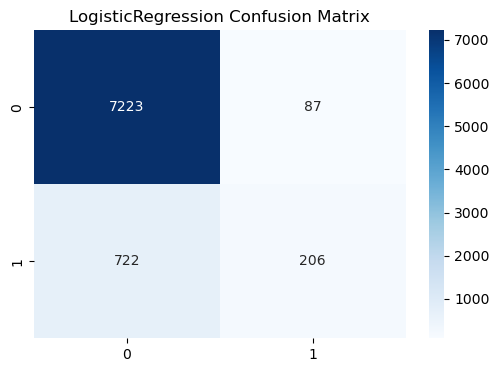

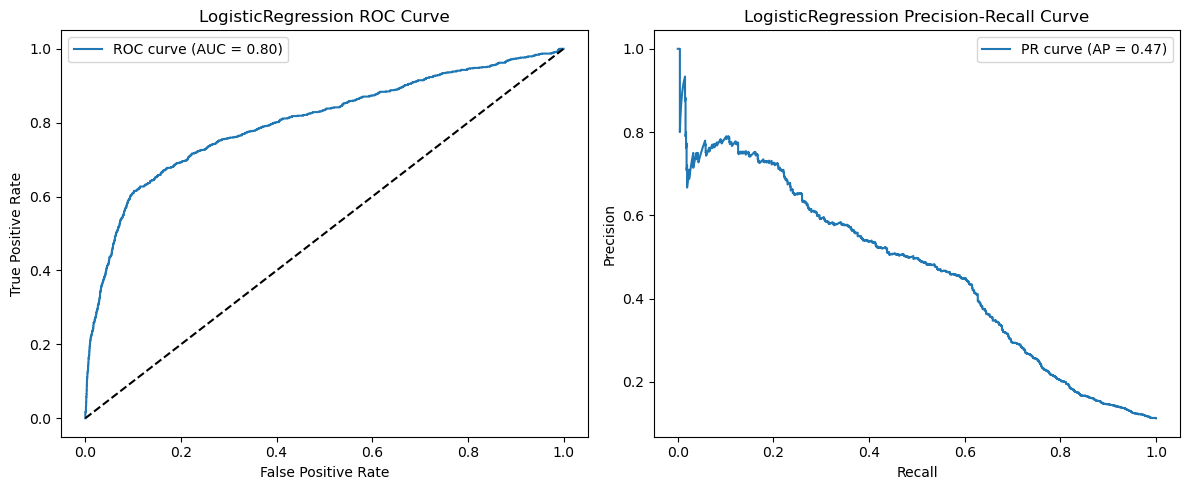


Evaluating Random Forest:

RandomForestClassifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.54      0.30      0.39       928

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



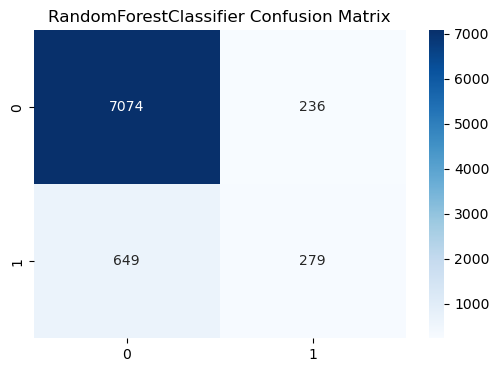

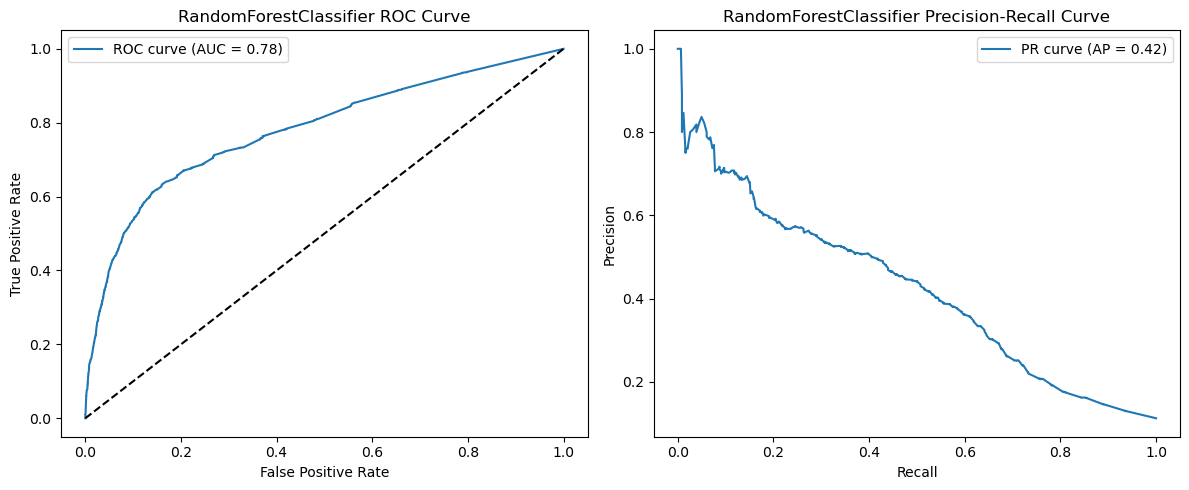


Evaluating XGBoost:

XGBClassifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.62      0.31      0.41       928

    accuracy                           0.90      8238
   macro avg       0.77      0.64      0.68      8238
weighted avg       0.88      0.90      0.89      8238



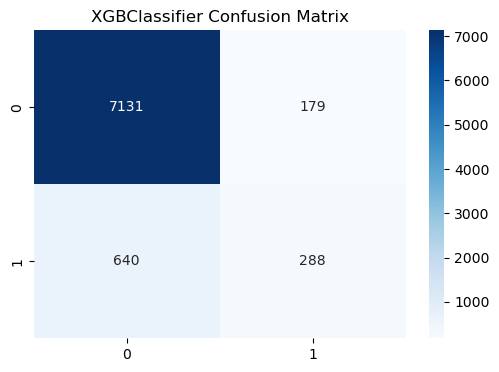

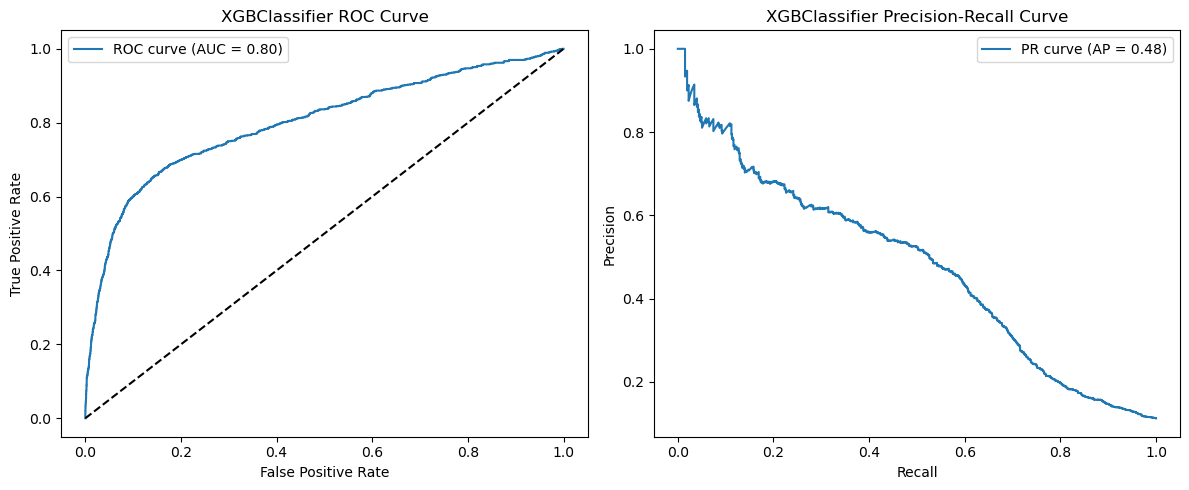


Evaluating LGBM:


  File "C:\Users\prasa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\prasa\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prasa\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\prasa\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898

LGBMClassifier Performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.67      0.28      0.39       928

    accuracy                           0.90      8238
   macro avg       0.79      0.63      0.67      8238
weighted avg       0.89      0.90      0.88      8238



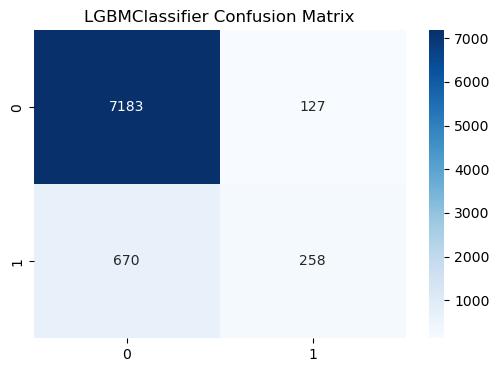

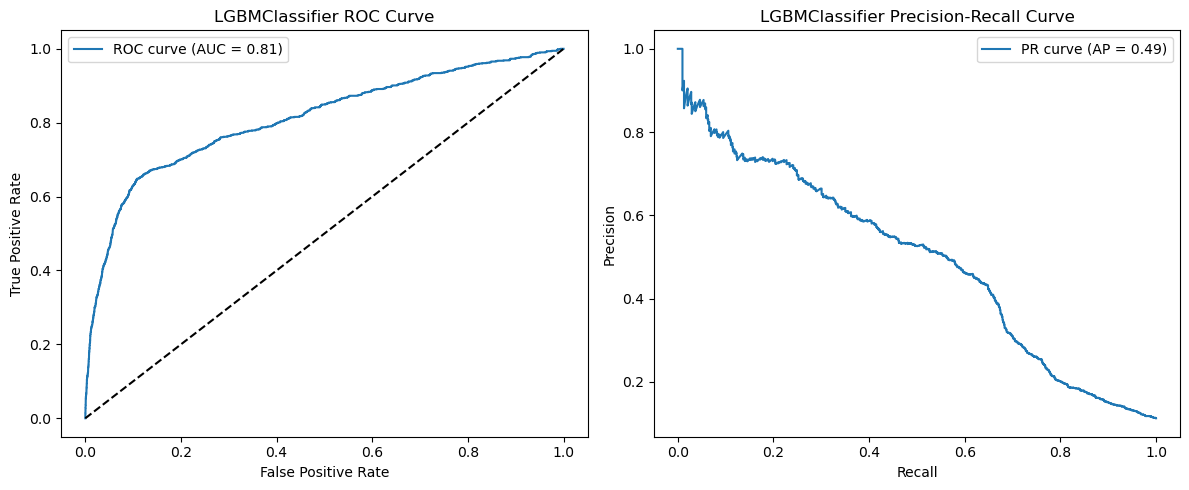

[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 43
[LightGBM] [Info] [bin

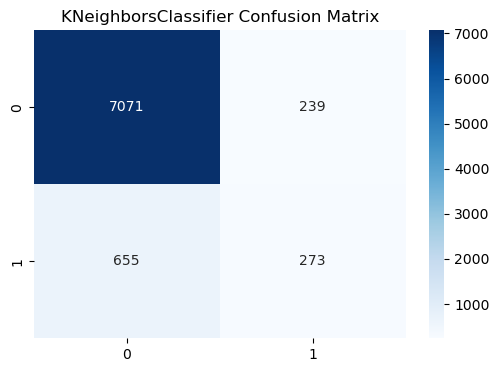

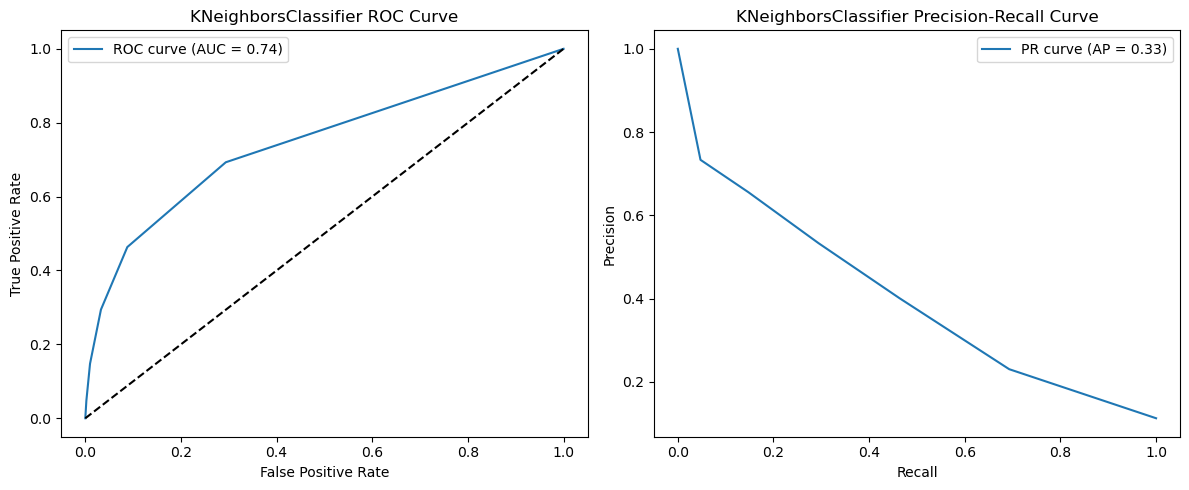


MODEL COMPARISON


,Model,F1-Score,ROC-AUC,Avg Precision,CV F1 Mean,CV F1 Std
2,XGBoost,0.412903,0.800507,0.476316,0.368560,0.016095
3,LGBM,0.392993,0.810353,0.493782,0.373875,0.014162
1,Random Forest,0.386694,0.779959,0.418557,0.358903,0.017390
4,K-Nearest Neighbors,0.379167,0.743590,0.333959,0.360139,0.015046
0,Logistic Regression,0.337428,0.800982,0.465971,0.336770,0.014720



BEST MODEL: XGBoost

REASON:
- Highest F1 Score: 0.4129
- Strong ROC AUC: 0.8005
- Consistent CV F1: 0.3686 (±0.0161)

FINAL EVALUATION OF BEST MODEL:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.62      0.31      0.41       928

    accuracy                           0.90      8238
   macro avg       0.77      0.64      0.68      8238
weighted avg       0.88      0.90      0.89      8238



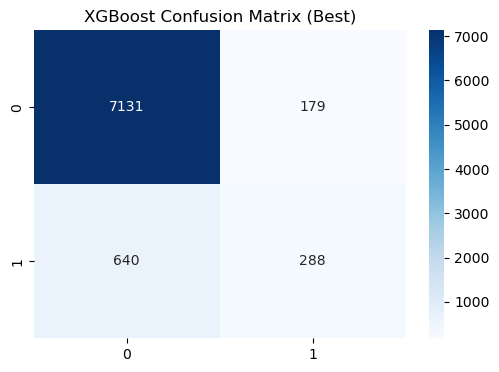

In [30]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score,
    precision_recall_curve, average_precision_score, roc_curve
)

# Defining models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LGBM": LGBMClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{type(model.named_steps['classifier']).__name__} Performance:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{type(model.named_steps["classifier"]).__name__} Confusion Matrix')
    plt.show()

    # ROC curve and Precision-Recall curve if predict_proba available
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
    
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)
    
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
        # ROC Curve
        axes[0].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[0].plot([0, 1], [0, 1], 'k--')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'{type(model.named_steps["classifier"]).__name__} ROC Curve')
        axes[0].legend()
    
        # Precision-Recall Curve
        axes[1].plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'{type(model.named_steps["classifier"]).__name__} Precision-Recall Curve')
        axes[1].legend()
    
        plt.tight_layout()
        plt.show()

    else:
        roc_auc = None
        avg_precision = None

    # Cross-validation scores on training set (f1)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    return {
        'model': model,
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

# Train and evaluate all models
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    pipeline = Pipeline([
        ('preprocessor', preprocessor), 
        ('classifier', model)
    ])
    results[name] = evaluate_model(pipeline, X_train, y_train, X_test, y_test)

# Compare and display results
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'F1-Score': [res['f1'] for res in results.values()],
    'ROC-AUC': [res['roc_auc'] for res in results.values()],
    'Avg Precision': [res['avg_precision'] for res in results.values()],
    'CV F1 Mean': [res['cv_mean'] for res in results.values()],
    'CV F1 Std': [res['cv_std'] for res in results.values()]
}).sort_values(by='F1-Score', ascending=False)

print("\nMODEL COMPARISON")
display(results_df.style.background_gradient(cmap='YlGnBu'))

# Summary for best model
best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\nBEST MODEL: {best_model_name}")
print(f"\nREASON:")
print(f"- Highest F1 Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"- Strong ROC AUC: {results_df.iloc[0]['ROC-AUC']:.4f}")
print(f"- Consistent CV F1: {results_df.iloc[0]['CV F1 Mean']:.4f} (±{results_df.iloc[0]['CV F1 Std']:.4f})")

print("\nFINAL EVALUATION OF BEST MODEL:")
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix (Best)')
plt.show()


### HYPERPARAMETER TUNING ON BEST MODEL

In [31]:
from sklearn.model_selection import RandomizedSearchCV

best_model_name = results_df.iloc[0]['Model']
print(f"Best Model Selected: {best_model_name}\n")

# Define hyperparameter grids 
param_grids = {
    "Logistic Regression": {
        'classifier__C': np.logspace(-3, 2, 10),
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs']
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0]
    },
    "LGBM": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__num_leaves': [31, 50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0]
    },
    "K-Nearest Neighbors": {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
}

# Retrieve pipeline for tuning from 'results' dictionary
pipeline_to_tune = results[best_model_name]['model']

# Retrieve param grid for that model
param_grid = param_grids[best_model_name]

# RandomizedSearchCV hyperparameter tuning
random_search = RandomizedSearchCV(
    pipeline_to_tune,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Get the best estimator pipeline
best_tuned_pipeline = random_search.best_estimator_

# Predict on test set using tuned model
y_proba = best_tuned_pipeline.predict_proba(X_test)[:, 1]
y_pred = best_tuned_pipeline.predict(X_test)

# Print results and classification report
print(f"\nBest Hyperparameters for {best_model_name}:\n")
print(random_search.best_params_)

print(f"\nClassification Report for Tuned {best_model_name}:\n")
print(classification_report(y_test, y_pred))

print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision (PR-AUC): {average_precision_score(y_test, y_proba):.4f}")


Best Model Selected: XGBoost

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters for XGBoost:

{'classifier__subsample': 0.8, 'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.2}

Classification Report for Tuned XGBoost:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.59      0.35      0.44       928

    accuracy                           0.90      8238
   macro avg       0.75      0.66      0.69      8238
weighted avg       0.88      0.90      0.89      8238

ROC AUC: 0.7787
Average Precision (PR-AUC): 0.4384


In [32]:
results_df = pd.DataFrame({
    ...
})
no_smote_results_df = results_df
no_smote_results = results


In [33]:

no_smote_results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'F1-Score': [res['f1'] for res in results.values()],
    'ROC-AUC': [res['roc_auc'] for res in results.values()],
    'Avg Precision': [res['avg_precision'] for res in results.values()],
    'CV F1 Mean': [res['cv_mean'] for res in results.values()],
    'CV F1 Std': [res['cv_std'] for res in results.values()]
}).sort_values(by='F1-Score', ascending=False)

no_smote_results = results.copy()


## PART 2: MULTIPLE MODELS WITH CLASS WEIGHT BALANCING AND WITHOUT SMOTE

Training Logistic Regression:

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.36      0.64      0.46       928

    accuracy                           0.83      8238
   macro avg       0.66      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238

F1-Score: 0.4648
ROC AUC: 0.8009
Avg Precision: 0.4608
CV F1: 0.4499 ± 0.0103

Training Random Forest:

Random Forest Results:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.54      0.30      0.38       928

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

F1-Score: 0.3850
ROC AUC: 0.7813
Avg Precision: 0.4153
CV F1: 0.3545 ± 0.0110

Training XGBoost:

XGBoost Results:
              precision    recall  f1-score 

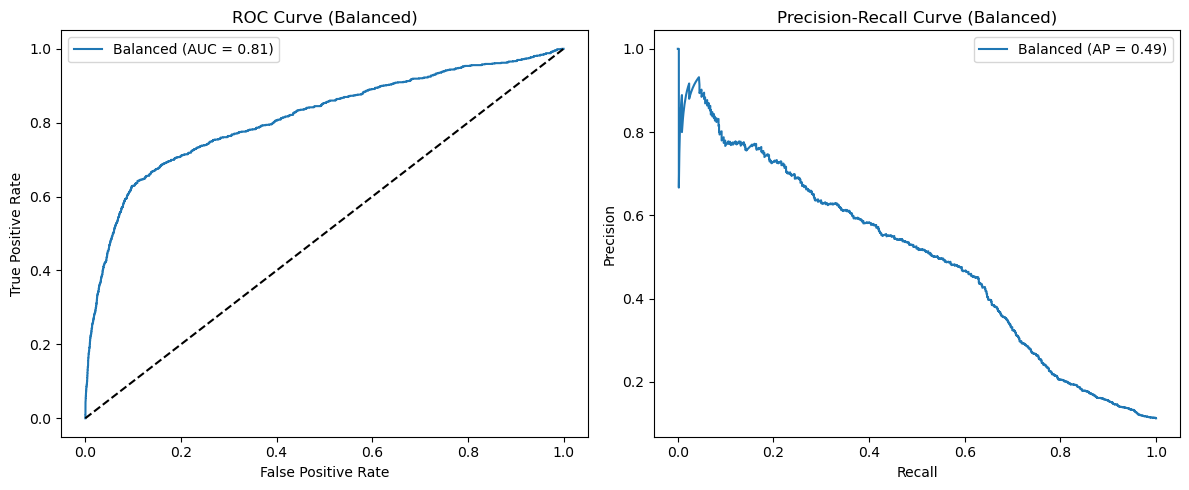

In [34]:

# Define models with class_weight='balanced'
models = {
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
    ]),
    "XGBoost": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(random_state=42,
                                     scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])))
    ]),
    "LGBM": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(random_state=42, class_weight='balanced'))
    ])
}

balanced_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}:")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    
    # Cross-validation F1 score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    balanced_results[model_name] = {
        'model': model,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'cv_mean': cv_mean,
        'cv_std': cv_std
    }
    
    # Print results
    print(f"\n{model_name} Results:")
    print(classification_report(y_test, y_pred))
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Avg Precision: {avg_precision:.4f}")
    print(f"CV F1: {cv_mean:.4f} ± {cv_std:.4f}\n")

# Create results DataFrame
balanced_results_df = pd.DataFrame({
    'Model': [name for name in balanced_results],
    'F1-Score': [balanced_results[name]['f1'] for name in balanced_results],
    'ROC AUC': [balanced_results[name]['roc_auc'] for name in balanced_results],
    'Avg Precision': [balanced_results[name]['avg_precision'] for name in balanced_results],
    'CV F1 Mean': [balanced_results[name]['cv_mean'] for name in balanced_results],
    'CV F1 Std': [balanced_results[name]['cv_std'] for name in balanced_results]
})

# Sort by F1-Score
balanced_results_df = balanced_results_df.sort_values(by='F1-Score', ascending=False)
print("\nSummary of Results (Class Weight Balanced, No SMOTE):")
print(balanced_results_df)

# Compute composite score for best model
def compute_score(result, weights={'f1': 0.5, 'roc_auc': 0.3, 'avg_precision': 0.2}):
    return (
        result['f1'] * weights['f1'] +
        result['roc_auc'] * weights['roc_auc'] +
        result['avg_precision'] * weights['avg_precision']
    )

best_model_balanced_name = balanced_results_df.iloc[0]['Model']
best_model_balanced = balanced_results[best_model_balanced_name]
score_balanced = compute_score(best_model_balanced)

print(f"\nBest Model with Class Weight Balancing: {best_model_balanced_name}")
print(f"   • F1 Score      : {best_model_balanced['f1']:.4f}")
print(f"   • ROC AUC       : {best_model_balanced['roc_auc']:.4f}")
print(f"   • Avg Precision : {best_model_balanced['avg_precision']:.4f}")
print(f"   • CV F1         : {best_model_balanced['cv_mean']:.4f} ± {best_model_balanced['cv_std']:.4f}")
print(f"   • Composite Score: {score_balanced:.4f}")

# Plot ROC and PR Curves for best model
def plot_roc_pr(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    return (fpr, tpr, roc_auc), (recall, precision, ap)

roc_balanced, pr_balanced = plot_roc_pr(best_model_balanced['model'], X_test, y_test)

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(roc_balanced[0], roc_balanced[1], label=f"Balanced (AUC = {roc_balanced[2]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Balanced)')
plt.legend()

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(pr_balanced[0], pr_balanced[1], label=f"Balanced (AP = {pr_balanced[2]:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Balanced)')
plt.legend()

plt.tight_layout()
plt.show()


### HYPERPARAMETER TUNING FOR BEST MODEL

In [35]:
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform

# Define parameter grids
param_grids = {
    "Logistic Regression": {
        'classifier__C': uniform(0.01, 10),
        'classifier__penalty': ['l2', None],
        'classifier__solver': ['lbfgs', 'saga'],
        'classifier__class_weight': [None, 'balanced']
    },
    "Random Forest": {
        'classifier__n_estimators': randint(100, 300),
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': randint(2, 10),
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__class_weight': [None, 'balanced']
    },
    "XGBoost": {
        'classifier__n_estimators': randint(100, 300),
        'classifier__max_depth': randint(3, 10),
        'classifier__learning_rate': uniform(0.01, 0.3),
        'classifier__subsample': uniform(0.6, 0.4),
        'classifier__colsample_bytree': uniform(0.6, 0.4),
        'classifier__scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
    },
    "LGBM": {
        'classifier__n_estimators': randint(100, 300),
        'classifier__max_depth': randint(3, 10),
        'classifier__learning_rate': uniform(0.01, 0.3),
        'classifier__subsample': uniform(0.6, 0.4),
        'classifier__colsample_bytree': uniform(0.6, 0.4),
        'classifier__reg_alpha': uniform(0, 1),
        'classifier__reg_lambda': uniform(0, 1),
        'classifier__class_weight': [None, 'balanced']
    }
}

# Select parameter grid based on the previously selected best model name
tuning_params = param_grids[best_model_balanced_name]

# Define custom composite scorer
def composite_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    y_proba = estimator.predict_proba(X)[:, 1]
    
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba)
    avg_precision = average_precision_score(y, y_proba)
    
    return (0.5 * f1) + (0.3 * roc_auc) + (0.2 * avg_precision)

custom_scorer = make_scorer(composite_scorer, greater_is_better=True)

# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=best_model_balanced['model'],
    param_distributions=tuning_params,
    n_iter=30,
    scoring=custom_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print(f"\nStarting Hyperparameter Tuning for {best_model_balanced_name}...")
random_search.fit(X_train, y_train)

# Get best tuned model
best_tuned_balanced_model = random_search.best_estimator_
print("\nBest Hyperparameters:")
print(random_search.best_params_)

# Evaluation after tuning
y_pred_tuned = best_tuned_balanced_model.predict(X_test)
y_proba_tuned = best_tuned_balanced_model.predict_proba(X_test)[:, 1]

print("\nTuned Model Performance:")
print(classification_report(y_test, y_pred_tuned))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_tuned):.4f}")
print(f"Avg Precision: {average_precision_score(y_test, y_proba_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")

# Performance comparison with before tuning
y_pred_before = best_model_balanced['model'].predict(X_test)
y_proba_before = best_model_balanced['model'].predict_proba(X_test)[:, 1]

f1_before = f1_score(y_test, y_pred_before)
roc_auc_before = roc_auc_score(y_test, y_proba_before)
avg_precision_before = average_precision_score(y_test, y_proba_before)

f1_after = f1_score(y_test, y_pred_tuned)
roc_auc_after = roc_auc_score(y_test, y_proba_tuned)
avg_precision_after = average_precision_score(y_test, y_proba_tuned)

print("\nPerformance Comparison (Before vs After Hyperparameter Tuning)")
print("===================================================================")
print(f"F1-Score        | Before: {f1_before:.4f} | After: {f1_after:.4f}")
print(f"ROC AUC         | Before: {roc_auc_before:.4f} | After: {roc_auc_after:.4f}")
print(f"Avg Precision   | Before: {avg_precision_before:.4f} | After: {avg_precision_after:.4f}")

# Final judgment on tuning impact
if f1_after > f1_before:
    print("\nConclusion: Hyperparameter tuning improved model performance based on F1-Score.")
else:
    print("\nConclusion: Original model had higher F1-Score — tuning didn't help much on this metric.")

if roc_auc_after > roc_auc_before:
    print("ROC AUC also improved after tuning.")
else:
    print("ROC AUC remained the same or slightly dropped.")

if avg_precision_after > avg_precision_before:
    print("Average Precision improved after tuning.")
else:
    print("Average Precision remained similar or dropped.")



Starting Hyperparameter Tuning for LGBM...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

### FINDING OPTIMAL THRESHOLD FOR LGBM MODEL BASED ON F1 SCORE

In [36]:

# Load the best LGBM pipeline from balanced results dictionary
lgbm_pipeline = balanced_results["LGBM"]["model"]

# Predict probabilities for positive class
y_proba_lgbm = lgbm_pipeline.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds for Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_lgbm)

# Calculate F1 scores for all thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Find index of best F1 score and corresponding threshold
best_idx = np.argmax(f1_scores[:-1])  # exclude last threshold which is invalid for pred
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold for LGBM: {best_threshold:.3f}")
print(f"Best F1-Score at this Threshold: {best_f1:.4f}")

# Predict binary labels using the optimal threshold
y_pred_optimal_lgbm = (y_proba_lgbm >= best_threshold).astype(int)

# Evaluate performance at optimal threshold
print("\nClassification Report with Optimal Threshold (LGBM):\n")
print(classification_report(y_test, y_pred_optimal_lgbm))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_lgbm):.4f}")
print(f"Average Precision (PR-AUC): {average_precision_score(y_test, y_proba_lgbm):.4f}")


Best Threshold for LGBM: 0.649
Best F1-Score at this Threshold: 0.5280

Classification Report with Optimal Threshold (LGBM):

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7310
           1       0.48      0.59      0.53       928

    accuracy                           0.88      8238
   macro avg       0.71      0.76      0.73      8238
weighted avg       0.89      0.88      0.89      8238

ROC AUC: 0.8118
Average Precision (PR-AUC): 0.4946


## PART 3: MULTIPLE MODELS WITH CLASS WEIGHT BALANCING AND SMOTE


Evaluating Logistic Regression with SMOTE + Class Weights:

LogisticRegression Performance:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7310
           1       0.35      0.65      0.46       928

    accuracy                           0.83      8238
   macro avg       0.65      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238



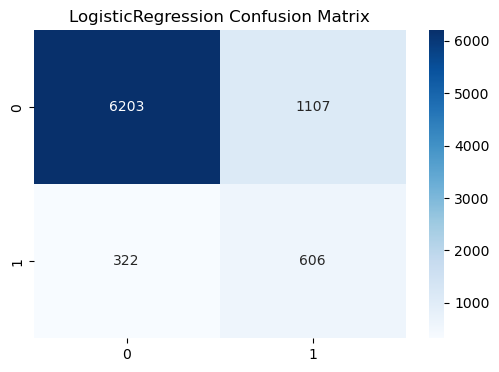

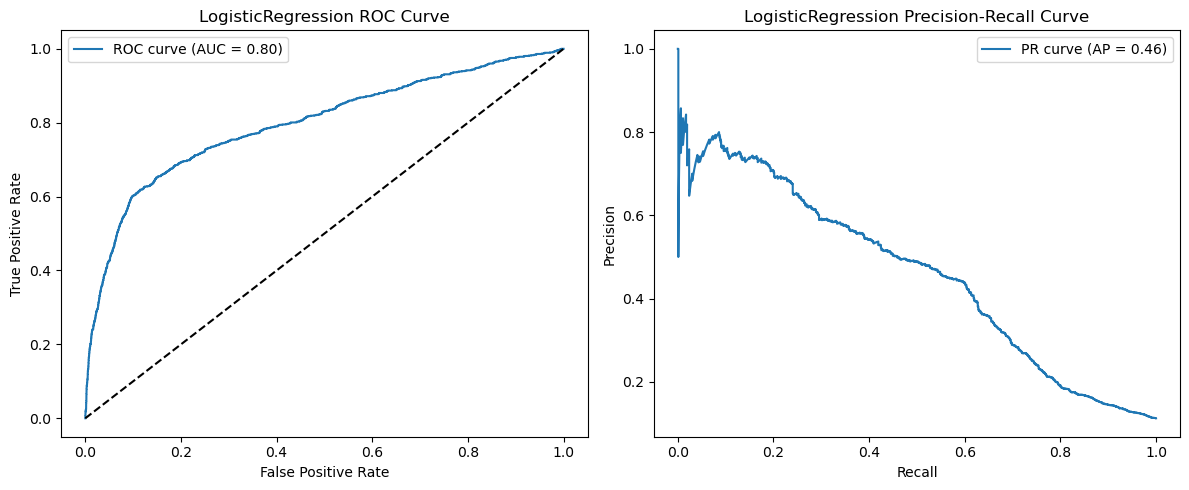


Evaluating Random Forest with SMOTE + Class Weights:

RandomForestClassifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7310
           1       0.49      0.38      0.43       928

    accuracy                           0.89      8238
   macro avg       0.71      0.67      0.68      8238
weighted avg       0.88      0.89      0.88      8238



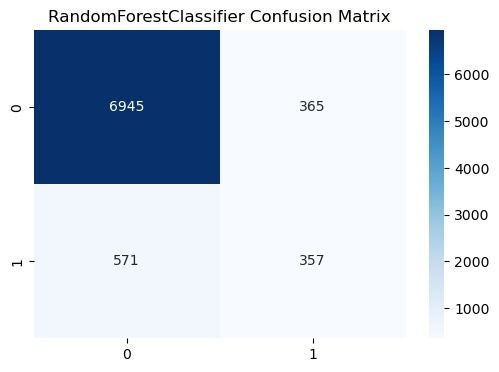

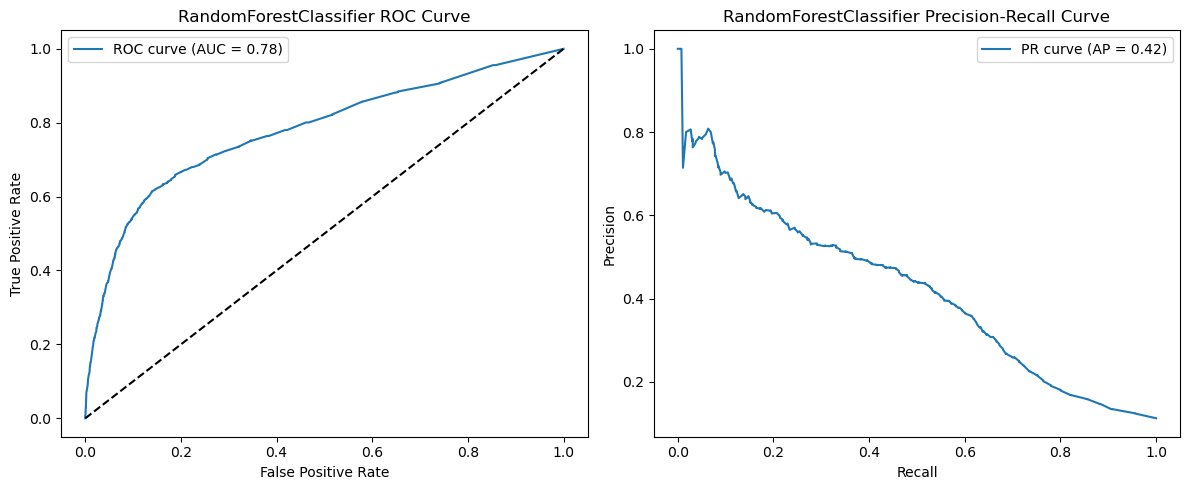


Evaluating XGBoost with SMOTE + Class Weights:

XGBClassifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.59      0.36      0.45       928

    accuracy                           0.90      8238
   macro avg       0.76      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



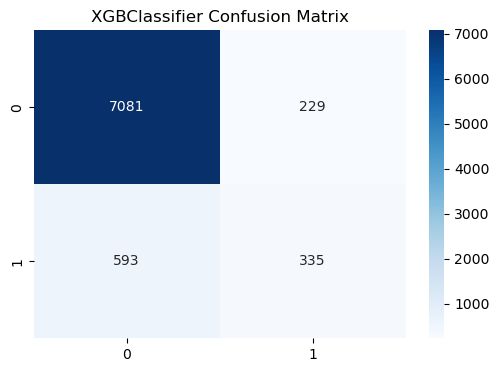

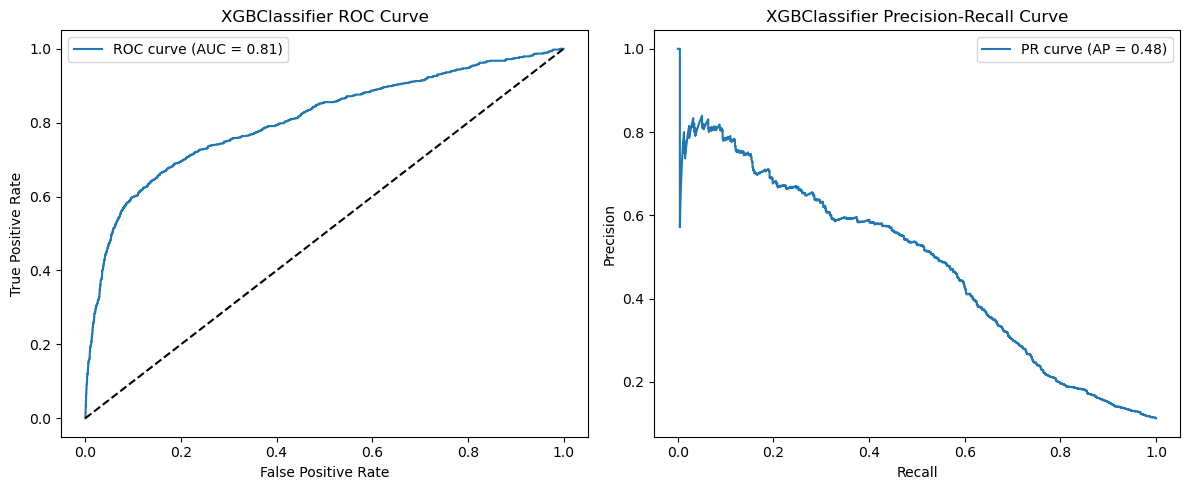


Evaluating LGBM with SMOTE + Class Weights:
[LightGBM] [Info] Number of positive: 29238, number of negative: 29238
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10338
[LightGBM] [Info] Number of data points in the train set: 58476, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LGBMClassifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.61      0.37      0.46       928

    accuracy                           0.90      8238
   macro avg       0.76      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238



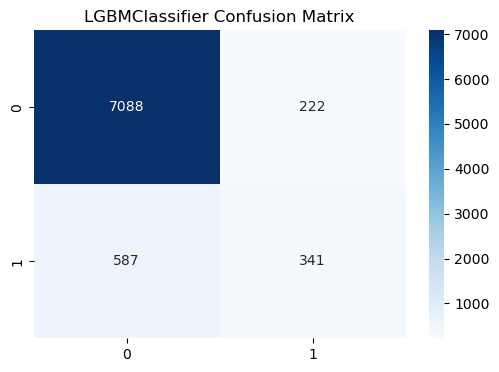

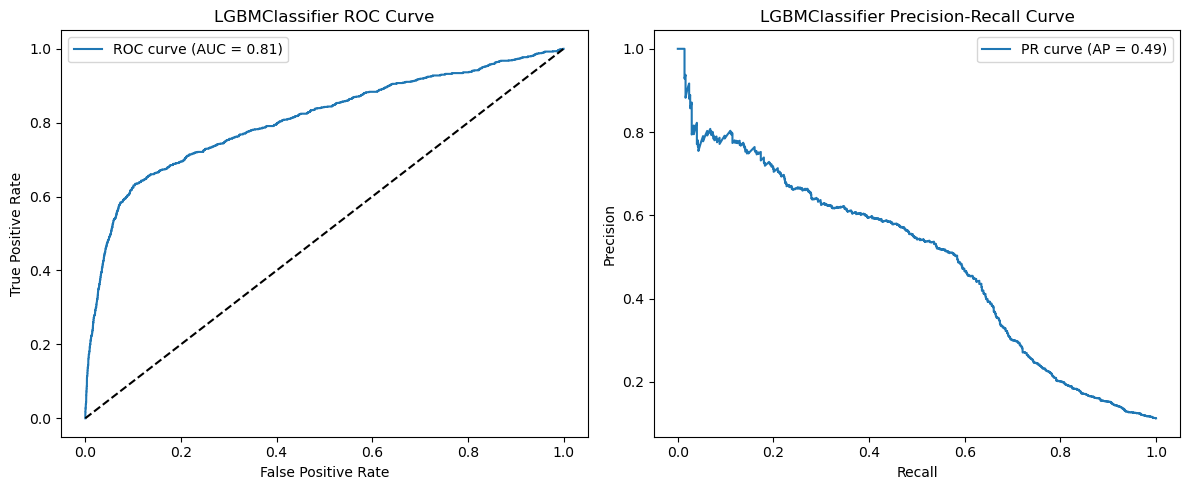

[LightGBM] [Info] Number of positive: 23390, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10331
[LightGBM] [Info] Number of data points in the train set: 46780, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 23390, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10316
[LightGBM] [Info] Number of data points in the train set: 46780, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0

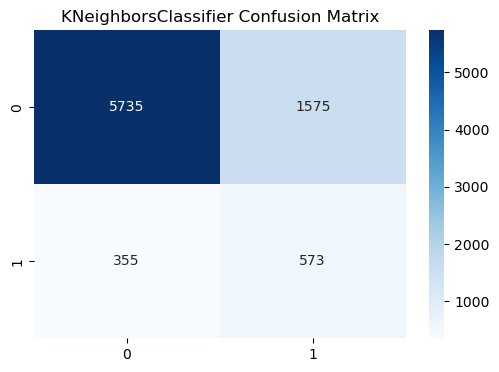

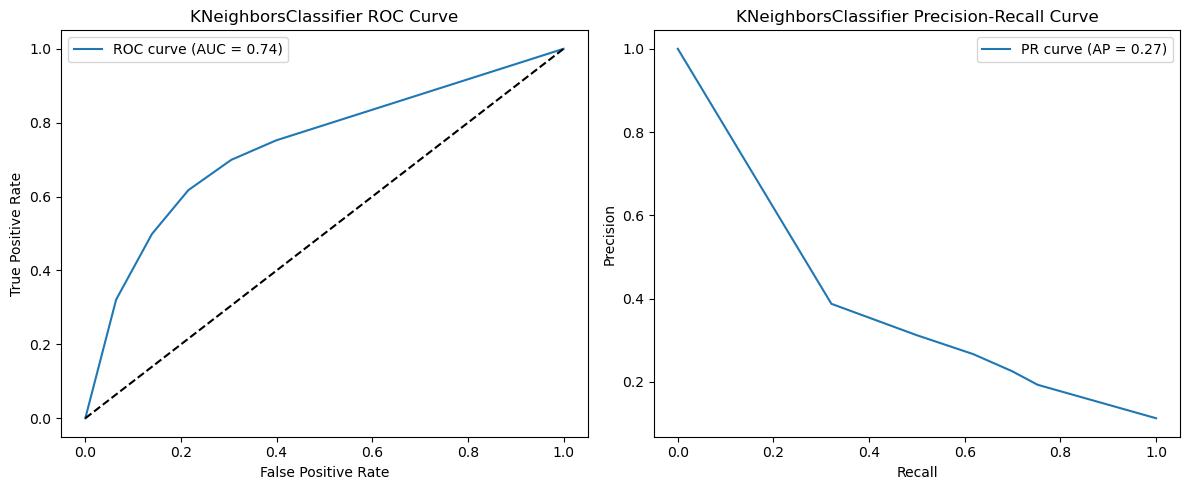


MODEL COMPARISON TABLE:


,Model,F1-Score,ROC-AUC,Avg Precision,CV F1 Mean,CV F1 Std
0,Logistic Regression,0.458917,0.797352,0.459142,0.440337,0.012910
3,LGBM,0.457411,0.806962,0.491451,0.412342,0.011970
2,XGBoost,0.449062,0.805527,0.476545,0.385919,0.013887
1,Random Forest,0.432727,0.778749,0.416294,0.389161,0.007615
4,KNN,0.372562,0.737227,0.268184,0.350993,0.006457



BEST MODEL: Logistic Regression
F1-Score: 0.4589
ROC-AUC: 0.7974
Avg Precision: 0.4591
CV F1 Mean: 0.4403 ± 0.0129

This model performed best based on F1-Score, balanced ROC AUC, and consistent cross-validation scores.


In [37]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # SMOTE-compatible pipeline

# Define Models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LGBM": LGBMClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier()
}

# Define evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print(f"\n{type(model.named_steps['classifier']).__name__} Performance:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{type(model.named_steps["classifier"]).__name__} Confusion Matrix')
    plt.show()

    # ROC and PR Curves
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
    
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)
    
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
        # ROC Curve
        axes[0].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[0].plot([0, 1], [0, 1], 'k--')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'{type(model.named_steps["classifier"]).__name__} ROC Curve')
        axes[0].legend()
    
        # Precision-Recall Curve
        axes[1].plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'{type(model.named_steps["classifier"]).__name__} Precision-Recall Curve')
        axes[1].legend()
    
        plt.tight_layout()
        plt.show()

    else:
        roc_auc = avg_precision = None

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    return {
        'model': model,
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

# SMOTE on Training Data
results_smote = {}

for name, model in models.items():
    print(f"\nEvaluating {name} with SMOTE + Class Weights:")

    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),  
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    results_smote[name] = evaluate_model(pipeline, X_train, y_train, X_test, y_test)

# Compare Models
results_df = pd.DataFrame({
    'Model': list(results_smote.keys()),
    'F1-Score': [res['f1'] for res in results_smote.values()],
    'ROC-AUC': [res['roc_auc'] for res in results_smote.values()],
    'Avg Precision': [res['avg_precision'] for res in results_smote.values()],
    'CV F1 Mean': [res['cv_mean'] for res in results_smote.values()],
    'CV F1 Std': [res['cv_std'] for res in results_smote.values()]
}).sort_values(by='F1-Score', ascending=False)

print("\nMODEL COMPARISON TABLE:")
display(results_df.style.background_gradient(cmap='YlGnBu'))

# Report Best Model
best_model_name = results_df.iloc[0]['Model']
best_result = results_smote[best_model_name]

print(f"\nBEST MODEL: {best_model_name}")
print(f"F1-Score: {best_result['f1']:.4f}")
print(f"ROC-AUC: {best_result['roc_auc']:.4f}")
print(f"Avg Precision: {best_result['avg_precision']:.4f}")
print(f"CV F1 Mean: {best_result['cv_mean']:.4f} ± {best_result['cv_std']:.4f}")
print("\nThis model performed best based on F1-Score, balanced ROC AUC, and consistent cross-validation scores.")


In [38]:
results_df = pd.DataFrame({
    ...
})
smote_results_df = results_df
smote_results =results_smote


In [39]:
# After running evaluation loop
smote_results_df = pd.DataFrame({
    'Model': list(results_smote.keys()),
    'F1-Score': [res['f1'] for res in results_smote.values()],
    'ROC-AUC': [res['roc_auc'] for res in results_smote.values()],
    'Avg Precision': [res['avg_precision'] for res in results_smote.values()],
    'CV F1 Mean': [res['cv_mean'] for res in results_smote.values()],
    'CV F1 Std': [res['cv_std'] for res in results_smote.values()]
}).sort_values(by='F1-Score', ascending=False)

smote_results = results_smote.copy()


### HYPERPARAMETER TUNING FOR BEST MODEL

In [40]:

best_model_name = smote_results_df.iloc[0]['Model']
print(f"Best Model Selected: {best_model_name}\n")

# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        'classifier__C': np.logspace(-3, 2, 10),
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs']
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0]
    },
    "LGBM": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__num_leaves': [31, 50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0]
    },
    "KNN": {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
}

# Prepare pipeline and hyperparameters for tuning
pipeline_to_tune = smote_results[best_model_name]['model']
param_grid = param_grids[best_model_name]

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline_to_tune,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Get the best tuned pipeline
best_tuned_pipeline = random_search.best_estimator_

# Predict on test set
y_proba = best_tuned_pipeline.predict_proba(X_test)[:, 1]
y_pred = best_tuned_pipeline.predict(X_test)

print(f"\nBest Hyperparameters for {best_model_name}:\n")
print(random_search.best_params_)

print(f"\nClassification Report for Tuned {best_model_name}:\n")
print(classification_report(y_test, y_pred))

print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision (PR-AUC): {average_precision_score(y_test, y_proba):.4f}")


Best Model Selected: Logistic Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters for Logistic Regression:

{'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__C': 0.046415888336127795}

Classification Report for Tuned Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7310
           1       0.35      0.65      0.46       928

    accuracy                           0.82      8238
   macro avg       0.65      0.75      0.68      8238
weighted avg       0.88      0.82      0.85      8238

ROC AUC: 0.7981
Average Precision (PR-AUC): 0.4605


## 7. COMPARISON REPORT

SUMMARY OF ALL MODELS (SORTED BY COMPOSITE SCORE)
Balanced - LGBM
  F1 Score       : 0.5280
  ROC AUC        : 0.8118
  Avg Precision  : 0.4946
  CV F1 (mean±std): 0.4650 ± 0.0131
  Threshold used : 0.6489281072307026
  Composite Score: 0.6065
----------------------------------------
Balanced - XGBoost
  F1 Score       : 0.4762
  ROC AUC        : 0.7967
  Avg Precision  : 0.4599
  CV F1 (mean±std): 0.4287 ± 0.0123
  Threshold used : 0.5
  Composite Score: 0.5691
----------------------------------------
SMOTE - LGBM
  F1 Score       : 0.4574
  ROC AUC        : 0.8070
  Avg Precision  : 0.4915
  CV F1 (mean±std): 0.4123 ± 0.0120
  Threshold used : 0.5
  Composite Score: 0.5691
----------------------------------------
Balanced - Logistic Regression
  F1 Score       : 0.4648
  ROC AUC        : 0.8009
  Avg Precision  : 0.4608
  CV F1 (mean±std): 0.4499 ± 0.0103
  Threshold used : 0.5
  Composite Score: 0.5648
----------------------------------------
SMOTE - XGBoost
  F1 Score       : 0.449

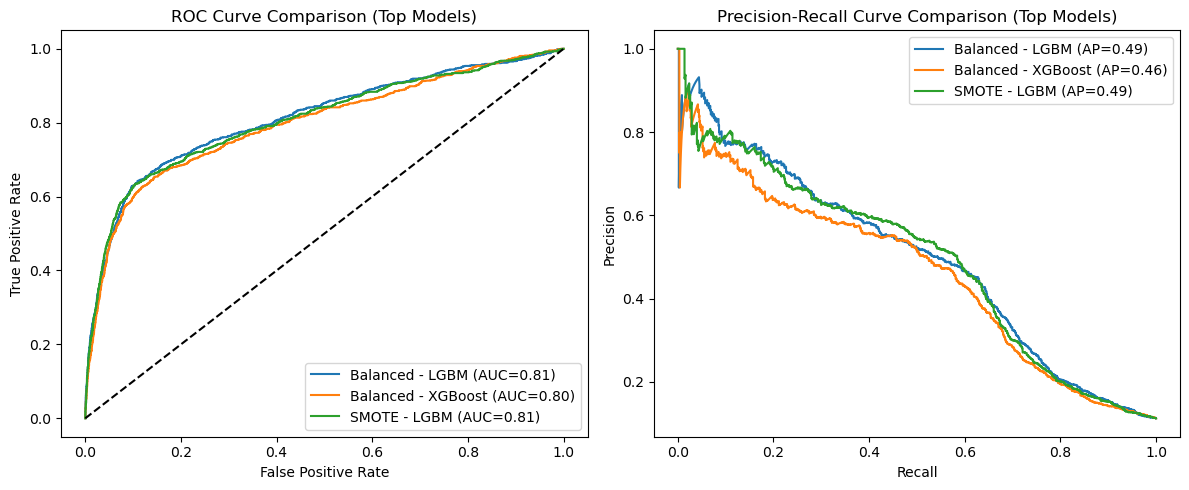


FINAL CLASSIFICATION REPORT FOR BEST MODEL:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7310
           1       0.48      0.59      0.53       928

    accuracy                           0.88      8238
   macro avg       0.71      0.76      0.73      8238
weighted avg       0.89      0.88      0.89      8238

Confusion Matrix:
[[6702  608]
 [ 377  551]]


In [41]:

def compute_score(result, weights={'f1': 0.5, 'roc_auc': 0.3, 'avg_precision': 0.2}):
    return (
        result['f1'] * weights['f1'] +
        result['roc_auc'] * weights['roc_auc'] +
        result['avg_precision'] * weights['avg_precision']
    )

# Collect all models from all experiments
all_models = {}

# add models from a results dict 
def add_models_from_results(results_dict, label_prefix):
    for name, res in results_dict.items():
        model = res['model']
        # Calculate test metrics 
        y_proba = model.predict_proba(X_test)[:, 1]
        f1 = f1_score(y_test, (y_proba >= 0.5).astype(int))  # default 0.5 threshold for all except tuned
        roc_auc = roc_auc_score(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)
        
        all_models[f"{label_prefix} - {name}"] = {
            'model': model,
            'f1': f1,
            'roc_auc': roc_auc,
            'avg_precision': avg_precision,
            'cv_mean': res.get('cv_mean', None),
            'cv_std': res.get('cv_std', None),
            'threshold': 0.5  # default threshold
        }

# Add no_smote models
add_models_from_results(no_smote_results, "No SMOTE")

# Add smote models
add_models_from_results(smote_results, "SMOTE")

# Add balanced models (e.g. class weighted)
add_models_from_results(balanced_results, "Balanced")

# Adjust threshold for threshold-tuned LGBM model 
# Assume balanced_results has LGBM model as before
lgbm_key = None
for k in all_models:
    if "Balanced - LGBM" in k:
        lgbm_key = k
        break

if lgbm_key is not None:
    lgbm_model = all_models[lgbm_key]['model']
    lgbm_proba = lgbm_model.predict_proba(X_test)[:, 1]
    # Recalculate with tuned threshold
    tuned_f1 = f1_score(y_test, (lgbm_proba >= best_threshold).astype(int))
    # Update the entry with tuned threshold info and new f1
    all_models[lgbm_key].update({
        'f1': tuned_f1,
        'threshold': best_threshold
    })

# Compute composite scores for all models
for name, res in all_models.items():
    res['composite_score'] = compute_score(res)

# Sort all models by composite score descending 
sorted_models = sorted(all_models.items(), key=lambda x: x[1]['composite_score'], reverse=True)

# Print summary for all models
print("SUMMARY OF ALL MODELS (SORTED BY COMPOSITE SCORE)")
print("="*50)
for name, res in sorted_models:
    print(f"{name}")
    print(f"  F1 Score       : {res['f1']:.4f}")
    print(f"  ROC AUC        : {res['roc_auc']:.4f}")
    print(f"  Avg Precision  : {res['avg_precision']:.4f}")
    if res['cv_mean'] is not None:
        print(f"  CV F1 (mean±std): {res['cv_mean']:.4f} ± {res['cv_std']:.4f}")
    print(f"  Threshold used : {res['threshold']}")
    print(f"  Composite Score: {res['composite_score']:.4f}")
    print("-"*40)

# Select best model 
winner_name, winner_res = sorted_models[0]
winner_model = winner_res['model']
print(f"\nBEST MODEL OVERALL: {winner_name}")
print("Reason: Highest composite score considering F1, ROC AUC, and Average Precision.")

# Plot ROC and PR curves for top 3 models 
def plot_roc_pr(model, X_test, y_test, threshold=0.5):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    return (fpr, tpr, roc_auc), (recall, precision, ap)

top_n = 3
plt.figure(figsize=(12, 5))

# ROC plot
plt.subplot(1, 2, 1)
for i in range(min(top_n, len(sorted_models))):
    name, res = sorted_models[i]
    roc, _ = plot_roc_pr(res['model'], X_test, y_test, res['threshold'])
    plt.plot(roc[0], roc[1], label=f"{name} (AUC={roc[2]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison (Top Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# PR plot
plt.subplot(1, 2, 2)
for i in range(min(top_n, len(sorted_models))):
    name, res = sorted_models[i]
    _, pr = plot_roc_pr(res['model'], X_test, y_test, res['threshold'])
    plt.plot(pr[0], pr[1], label=f"{name} (AP={pr[2]:.2f})")

plt.title("Precision-Recall Curve Comparison (Top Models)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()

# Final classification report and confusion matrix for best model 
# Use tuned threshold if available
if winner_res['threshold'] != 0.5:
    y_pred_winner = (winner_res['model'].predict_proba(X_test)[:, 1] >= winner_res['threshold']).astype(int)
else:
    y_pred_winner = winner_model.predict(X_test)

print("\nFINAL CLASSIFICATION REPORT FOR BEST MODEL:")
print(classification_report(y_test, y_pred_winner))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_winner))


# 8. TEST EXAMPLE

In [42]:

# Predict function using winner_model pipeline
def predict_subscription(input_data, winner_model, original_features, train_df):
    input_df = pd.DataFrame([input_data])
    
    # Fill missing columns with default values based on training data dtypes
    for col in original_features:
        if col not in input_df.columns:
            if pd.api.types.is_numeric_dtype(train_df[col]):
                input_df[col] = 0  # numeric default
            else:
                input_df[col] = 'unknown'  # categorical default

    # Arrange columns in exact order as training data
    input_df = input_df[original_features]

    # Predict using the pipeline (which includes preprocessing)
    prediction = winner_model.predict(input_df)[0]
    probability = winner_model.predict_proba(input_df)[0][1]

    result = 'Yes' if prediction == 1 else 'No'
    return result, probability

# Example usage:
original_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
                     'was_contacted', 'contact_frequency']  # adjust if needed

new_client = {
    'age': 35,
    'job': 'admin.',
    'marital': 'married',
    'education': 'university.degree',
    'default': 'no',
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'month': 'may',
    'day_of_week': 'mon',
    'campaign': 1,
    'poutcome': 'nonexistent',
    'emp.var.rate': 1.4,
    'cons.price.idx': 93.918,
    'cons.conf.idx': -42.7,
    'euribor3m': 4.961,
    'nr.employed': 5228.1,
    'was_contacted': 1,
    'contact_frequency': 'low'
}

# Use the winner_model from your model selection step
result, prob = predict_subscription(new_client, winner_model, original_features, X_train)

print(f"\nPrediction: {result}")
print(f"Probability of subscription: {prob:.4f}")



Prediction: Yes
Probability of subscription: 0.6320


## BEST MODEL PICKLE FILE

In [43]:
import joblib

# Save the winner model pipeline
joblib.dump(winner_model, 'best_model_pipeline.pkl')

print("Best model saved as 'best_model_pipeline.pkl'")


Best model saved as 'best_model_pipeline.pkl'


# 9. CONCLUSION

# Bank Marketing Campaign Analysis Summary

## Project Overview
This project analyzed a Portuguese bank's phone-based marketing campaign to predict term deposit subscriptions, using a dataset of **41,188 records**. The dataset included:
- Client demographics
- Campaign interactions
- Economic indicators
- Subscription outcomes  

The goal was to develop a predictive model to optimize marketing strategies, addressing the challenge of **class imbalance** (fewer subscribers than non-subscribers).

---

## Key Findings

- **Best Model:**  
  LightGBM with class weight balancing achieved the highest **F1-score of 0.5280**, effectively identifying potential subscribers.

- **Critical Factors:**  
  Client demographics (e.g., job, education), campaign history (e.g., previous contacts), and economic indicators (e.g., employment variation rate) strongly influence subscriptions.

- **Seasonal Trends:**  
  Subscription rates **peak in May (900 subscriptions)** and are **lowest in December (90)**.

---

## Conclusions

- The **LightGBM model with class weight balancing** is the most effective for predicting term deposit subscriptions, achieving a robust **F1-score of 0.5280** and **ROC-AUC of 0.8118**.
- Class imbalance was successfully addressed, enabling accurate identification of potential subscribers.
- Key drivers include:
  - Client demographics
  - Campaign history
  - Economic conditions
- **May** identified as the optimal campaign month.

---

## Recommendations

### Deploy LightGBM Model:
Implement the tuned **LightGBM model (`best_model_pipeline.pkl`)** in the bank's CRM system for real-time or batch predictions to identify high-potential clients.

### Optimize Campaign Timing:
- Launch campaigns in **May** to capitalize on peak subscription rates (~900 subscriptions).
- Avoid **December** due to low subscription rates (~90).

### Target High-Potential Clients:
- Prioritize clients with **previous campaign contacts**, as they are more likely to subscribe.
- Tailor messaging for demographics like **"retired"** or **"student"** clients and those with **higher education**.

### Monitor Economic Trends:
Track:
- **Employment variation rate**
- **Consumer confidence index**
- **Euribor 3-month rate**  

to adjust campaign strategies accordingly.

### Ensure Continuous Improvement:
- Retrain the model with new data to maintain accuracy.
- Conduct **A/B testing** to refine campaign messaging and strategies.
